In [169]:
# Import necessary libraries
import os
import time  # Timer module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests

# -------------------------
# Data Loading Section
# -------------------------

'''
This section loads all the raw datasets needed for the analysis.
All datasets are expected to be in CSV format and located in the 'data' folder within the current working directory.

Datasets being loaded:
1. `full_states_behaviors_table_W23.csv` - Behavior data from Wave 23.
2. `health_behaviors_W27.csv` - Behavior data from Wave 27.
3. `death_daily_us_state.csv` - Daily death counts across US states.
4. `waves_interp27.csv` - Interpolated data from Wave 27.
5. `US_state_politic.csv` - Information on US states, including state codes and political details.
6. `us_state_vaccinations.csv` - US state-level vaccination data.
7. hospit
8. vax

The variables created after loading these datasets are used for further analysis and preprocessing.
'''

# Start timer
start_time = time.time()

# Get the current working directory
path = os.getcwd()

# Define the 'data' folder path
data_folder = os.path.join(path, 'data')

## -----------------------------------
## Load datasets from the 'data' folder

# Load the behavior dataset from Wave 27
raw_behave_dt27 = pd.read_csv(f'{data_folder}/behaviors_perc_till_wv27_sept30.csv')

# Load the daily death data for US states
death_daily = pd.read_csv(f'{data_folder}/death_daily_us_state.csv')

# Load the hospitalization data for US states
raw_hospit_data = pd.read_csv(f'{data_folder}/owid_US_COVID-19_Hospitalization_Metrics_by_Jurisdiction__Timeseries_20240509.csv')

# Load the case count data for US states

# Load the vaccination data
# vax_dt = pd.read_csv(path + '/us_state_vaccinations.csv')

# Load wave periods with gaps for Wave 27
raw_wave_data = pd.read_csv(f'{data_folder}/waves_interpolation.csv')

# Load US state codes and political information
state_code_list = pd.read_csv(f'{data_folder}/US_state_politic.csv')

# Load US state level population from 2021 census
nst_est2021 = pd.read_csv('/Users/tamannaurmi/Documents/Research/missing_cases/' + 'NST-EST2021-alldata.csv')

# Create a list of US states
state_list = list(state_code_list['State'].values)

# Create dictionaries for state-to-code and code-to-state mappings
state_to_code = dict(zip(state_code_list['State'], state_code_list['Code']))
code_to_state = dict(zip(state_code_list['Code'], state_code_list['State']))

# End timer
end_time = time.time()

# Calculate total execution time
execution_time = end_time - start_time

# Print confirmation that data has been processed and saved
print(f"Datasets have been successfully loaded. Total execution time: {execution_time:.2f} seconds.")

# Start timer for preprocessing
start_time = time.time()

# Define the 'processed' folder path
processed_folder = os.path.join(path+'/data','processed')

# Create 'processed' folder if it doesn't exist
if not os.path.exists(processed_folder):
    os.makedirs(processed_folder)

# -------------------------
# Data Preprocessing Steps
# -------------------------
# Add your data preprocessing code here.
# For example:
# 1. Handle missing values
# 2. Normalize or standardize data
# 3. Feature engineering
# 4. Merge or split datasets if needed

# Example: processed data (uncomment and replace with actual steps)
# processed_behave_dt23 = raw_behave_dt23.copy()
# # [Insert processing steps here]

# -------------------------
# Generating and saving Processed Data
# -------------------------

processed_waves_data, processed_waves_w_bimonthly = pre_process_waves_period(raw_wave_data=raw_wave_data)
processed_behavior_data_interpolated = pre_process_interpolate_behavior(raw_behave_dt27, processed_waves_w_bimonthly)
processed_hospitalization_data = pre_process_hospitalization_data(raw_hospit_data)
processed_death_data = pre_process_death_monthly(death_daily, processed_waves_w_bimonthly)

processed_waves_data.to_csv(f'{processed_folder}/processed_waves_with_gaps.csv', index=False)
processed_behavior_data_interpolated.to_csv(f'{processed_folder}/behavior_wave_interpolated_all_state.csv', index=False)
processed_hospit_df.to_csv(f'{processed_folder}/hospitalization_state_monthly.csv', index=False)
processed_death_data.to_csv(f'{processed_folder}/death_monthly_state.csv', index=False)

# End timer
end_time = time.time()

# Calculate total execution time
execution_time = end_time - start_time

# Print confirmation that data has been processed and saved
print(f"Datasets have been successfully pre-processed and saved. Total execution time: {execution_time:.2f} seconds.")

Datasets have been successfully loaded. Total execution time: 0.20 seconds.


/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2243886609.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhv_wave_interp['End_Date'] = pd.to_datetime(bhv_wave_interp['End_Date'])
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2243886609.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhv_wave_interp['state'] = st
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2243886609.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Datasets have been successfully pre-processed and saved. Total execution time: 5.07 seconds.


/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/1002015936.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_death_agg['death_agg30'] = national_death_agg30
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/1002015936.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_death_agg['death_agg14'] = national_death_agg14


#### Pre-process wave time period data

In [167]:

def prior7(row):
    """
    Computes the date 7 days before the 'End_Date' for each row.
    
    Parameters:
    row (pd.Series): A row of the dataframe that contains an 'End_Date' column.
    
    Returns:
    prior_date (datetime): The date 7 days before the 'End_Date'.
    """
    given_date = datetime.strptime(row['End_Date'], '%m/%d/%Y')
    prior_date = given_date - timedelta(days=7)
    return prior_date

def prior14(row):
    """
    Computes the date 14 days before the 'End_Date' for each row.
    
    Parameters:
    row (pd.Series): A row of the dataframe that contains an 'End_Date' column.
    
    Returns:
    prior_date (datetime): The date 14 days before the 'End_Date'.
    """
    given_date = datetime.strptime(row['End_Date'], '%m/%d/%Y')
    prior_date = given_date - timedelta(days=14)
    return prior_date

def generate_date_sequence_with_labels(start_date, end_date):
    """
    Generates a sequence of dates between the given start and end dates, with labels for mid-month and month-end dates.

    This function creates a sequence of two types of dates:
    1. Month-end dates (last day of each month).
    2. Mid-month dates (14 days after the start of each month).

    The output is a pandas DataFrame with two columns:
    - 'Date': Contains the generated sequence of dates.
    - 'Label': Indicates whether the date corresponds to a 'month_end' or 'mid_month'.

    Parameters:
    ----------
    start_date : str or datetime-like
        The start date for the sequence generation. Can be a string in date format or a datetime object.
    end_date : str or datetime-like
        The end date for the sequence generation. Can be a string in date format or a datetime object.

    Returns:
    -------
    pd.DataFrame
        A DataFrame with two columns:
        - 'Date': The generated sequence of dates between the start and end date.
        - 'Label': Labels indicating whether each date is a 'month_end' or 'mid_month'.
    
    Example:
    --------
    >>> generate_date_sequence_with_labels('2020-01-01', '2020-06-30')
        Date        Label
    0   2020-01-14  mid_month
    1   2020-01-31  month_end
    2   2020-02-14  mid_month

    Notes:
    ------
    - Month-end dates are generated using the 'M' frequency in `pd.date_range()`.
    - Mid-month dates are created by adding 14 days to the first day of each month using the 'MS' frequency in `pd.date_range()`.
    - After generating both series, they are concatenated and sorted to produce the final DataFrame.
    """
    
    # Convert start_date to datetime object
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Generate date range for month-ends
    month_ends = pd.date_range(start=start_date, end=end_date, freq='M')

    # Generate date range for mid-months
    mid_months = pd.date_range(start=start_date, end=end_date, freq='MS') + pd.Timedelta(days=14)

    # Convert DatetimeIndex objects to Series
    month_ends_series = pd.Series(month_ends, name='Date')
    mid_months_series = pd.Series(mid_months, name='Date')

    # Concatenate separately and then sort the two date ranges
    date_sequence = pd.concat([month_ends_series, mid_months_series])

    # Create a DataFrame with dates and labels
    df = pd.DataFrame(date_sequence, columns=['Date'])
    df['Label'] = 'month_end'
    df.loc[df['Date'].isin(mid_months), 'Label'] = 'mid_month'

    # Sort values after concatenation
    df = df.sort_values(by='Date').reset_index(drop=True)

    return df

def pre_process_waves_period(raw_wave_data):
    """
    Pre-processes the raw wave data by calculating wave lengths, adding columns for dates
    7 and 14 days before the 'End_Date', and filtering the data for valid wave lengths.
    
    Steps:
    1. Computes the length of each wave (difference between 'Start_Date' and 'End_Date').
    2. Adds columns '7before_end' and '14before_end', containing dates 7 and 14 days prior to the 'End_Date'.
    3. Filters the waves that have valid wave lengths (greater than 0).
    4. Reformats 'End_Date' and 'Start_Date' columns to the '%m/%d/%Y' format.
    5. Returns the processed waves data and displays it.
    
    Parameters:
    raw_wave_data (pd.DataFrame): A dataframe containing 'Start_Date' and 'End_Date' columns.
    
    Returns:
    waves (pd.DataFrame): The pre-processed and filtered waves dataframe.
    """
    
    # Calculate the length of each wave (difference between End_Date and Start_Date)
    raw_wave_data['wave_lengths'] = raw_wave_data.apply(lambda row: datetime.strptime(row['End_Date'], '%Y-%m-%d') - datetime.strptime(row['Start_Date'], '%Y-%m-%d'), axis=1)
    
    # # Add columns for 7 and 14 days before the End_Date
    # raw_wave_data['7before_end'] = raw_wave_data.apply(lambda row: prior7(row), axis=1)
    # raw_wave_data['14before_end'] = raw_wave_data.apply(lambda row: prior14(row), axis=1)
    
    # Convert wave_lengths to numeric (in days) and filter out invalid wave lengths
    raw_wave_data['wave_lengths'] = pd.to_numeric(raw_wave_data['wave_lengths'].dt.days, downcast='integer')
    waves = raw_wave_data[raw_wave_data.wave_lengths > 0]
    
    # Reformat End_Date and Start_Date columns to '%m/%d/%Y'
    waves['End_Date'] = pd.to_datetime(waves['End_Date']).dt.strftime('%m/%d/%Y')
    waves['Start_Date'] = pd.to_datetime(waves['Start_Date']).dt.strftime('%m/%d/%Y')
    waves = waves[['Wave', 'Start_Date', 'End_Date', 'wave_lengths']]


    ## Crate additional date sequence to include regular bi-monthly dates among the wave end dates
    # Generate date range with samples on the last day of each month
    date_range = generate_date_sequence_with_labels('2020-03-31', '2023-05-31')
    date_range.rename(columns={'Date': 'End_Date', 'Label': 'month_intervals'}, inplace=True)

    # Convert the End_Date in the waves data to datetime for merging
    waves['End_Date'] = pd.to_datetime(waves['End_Date'])

    # Merge the date range (month intervals) with the waves data on the 'End_Date'
    waves_intervals = pd.merge(date_range, waves, on='End_Date', how='outer')

    # Convert Start_Date to string format for sorting and further processing
    waves_intervals['Start_Date'] = pd.to_datetime(waves_intervals['Start_Date']).dt.strftime('%Y-%m-%d')

    # Sort the intervals by End_Date
    waves_intervals = waves_intervals.sort_values(by='End_Date').reset_index(drop=True)

    # Select the relevant columns for the final output
    waves_intervals = waves_intervals[['Wave', 'month_intervals', 'Start_Date', 'End_Date', 'wave_lengths']]

    # Fill missing values in 'Wave' with 'gap' and 'month_intervals' with 'from wave'
    waves_intervals['Wave'] = waves_intervals['Wave'].fillna('interpolation')
    waves_intervals['month_intervals'] = waves_intervals['month_intervals'].fillna('from wave')
    
    return waves, waves_intervals



#### Pre-process hospitalization data

In [5]:
def pre_process_hospitalization_data(hospit_df):
    """
    Pre-processes the raw hospitalization data to compute monthly COVID-19 hospital admissions at both the state and national levels.

    The function performs the following steps:
    1. Extracts the month and year from the 'Collection Date' column and creates a new column 'mnth_yr'.
    2. Groups the data by 'mnth_yr' and 'Jurisdiction' to calculate the total number of hospital admissions for each state by month.
    3. Renames columns to reflect the changes: 'Jurisdiction' is renamed to 'state_code', and the total hospital admissions are renamed to 'monthly_hospitalization'.
    4. Calculates the national-level hospital admissions by summing the values across all states for each month and appends this data to the state-level data.
    5. Returns the processed dataframe containing both state-level and national-level monthly hospitalization data.

    Parameters:
    hospit_df (pd.DataFrame): The raw hospitalization data containing at least the columns 'Collection Date', 'Jurisdiction', and 'New COVID-19 Hospital Admissions'.

    Returns:
    hospit_monthly_df (pd.DataFrame): A dataframe containing the monthly hospitalization data, including a 'state_code' for each state and for the national level.

    Example:
    processed_monthly_hospitalization_data = pre_process_hospitalization_data(raw_hospit_data)
    """

    # Extract the month and year from the 'Collection Date' and create a new 'mnth_yr' column
    hospit_df['mnth_yr'] = hospit_df['Collection Date'].apply(lambda row: datetime.strptime(row, '%Y-%m-%d').strftime('%Y-%m'))

    # Group by 'mnth_yr' and 'Jurisdiction' to get the total hospital admissions for each state by month
    hospit_monthly_df = hospit_df[['mnth_yr', 'Jurisdiction', 'New COVID-19 Hospital Admissions']].groupby(['mnth_yr', 'Jurisdiction']).sum().reset_index()

    # Rename columns for clarity
    hospit_monthly_df.columns = ['mnth_yr', 'state_code', 'monthly_hospitalization']

    # Calculate the national-level hospitalization data by summing across all states
    hospit_national = hospit_monthly_df[['mnth_yr', 'monthly_hospitalization']].groupby('mnth_yr').sum().reset_index()
    hospit_national['state_code'] = 'National'

    # Append national-level data to the state-level data
    hospit_monthly_df = pd.concat([hospit_monthly_df, hospit_national], axis=0)

    # Return the processed dataframe
    return hospit_monthly_df


##### Preprocess death data

In [103]:
def pre_process_death_monthly(death_daily, waves_bimonthly):
    """
    Aggregates daily death counts into 30-day, 14-day, and 7-day rolling sums for each state and the national level 
    based on the given waves with bi-monthly intervals.

    Parameters:
    -----------
    death_daily : pd.DataFrame
        A DataFrame containing daily death counts for each state. 
        Expected columns: 
        - 'Province_State': State names
        - 'date_url': Dates in string format
        - 'death_daily': Daily death counts
        
    waves_bimonthly : pd.DataFrame
        A DataFrame containing the waves with corresponding end dates and month intervals.
        Expected columns:
        - 'Wave': Survey wave identifiers
        - 'month_intervals': Time intervals (in months) between waves
        - 'End_Date': The ending date for each wave in string or datetime format

    Returns:
    --------
    pd.DataFrame
        A DataFrame with aggregated death counts for 30-day, 14-day, and 7-day intervals for each state 
        and at the national level. Columns in the returned DataFrame include:
        - 'Wave': Survey wave identifier
        - 'month_intervals': Time intervals between waves
        - 'End_Date': End dates of the waves
        - 'death_agg30': Aggregated death count over the last 30 days
        - 'death_agg14': Aggregated death count over the last 14 days
        - 'death_agg7': Aggregated death count over the last 7 days
        - 'State': The state name or 'National' for national-level aggregation
        - 'new_ind': A new index for each row

    Notes:
    ------
    - The function first processes each state individually, aggregating deaths over the specified time windows (30, 14, 7 days).
    - After processing individual states, a national-level aggregation is performed by summing the deaths across all states for each time window.
    - The time windows (30, 14, and 7 days) end on the day prior to the 'End_Date' of each wave.
    
    """

    # Select necessary columns and convert 'date_url' to actual date format
    death_time_series = death_daily[['Province_State', 'date_url', 'death_daily']]
    death_time_series['date'] = pd.to_datetime(death_time_series['date_url']).dt.date
    
    # Initialize an empty DataFrame to store aggregated death counts for all states
    death_agg_all_state = pd.DataFrame()
    
    # Ensure 'End_Date' in waves_bimonthly is in datetime format
    waves_bimonthly['End_Date'] = pd.to_datetime(waves_bimonthly['End_Date'])
    
    # Loop through each state in the state_code_list and aggregate death data
    for st in state_code_list.State.values:
        # Initialize a DataFrame for the current state with wave and date info
        death_agg_st = waves_bimonthly[['Wave', 'month_intervals', 'End_Date']]
        
        # Filter death data for the current state
        death_time_series_st = death_time_series[death_time_series['Province_State'] == st]
        
        # Initialize lists to store aggregated values for the 30-day, 14-day, and 7-day windows
        agg30_values = []
        agg14_values = []
        agg7_values = []
        
        # Loop through each wave's end date and calculate rolling sums for deaths
        for date in waves_bimonthly.End_Date:
            start_date30 = pd.to_datetime(date - pd.Timedelta(days=30)).date()
            start_date14 = pd.to_datetime(date - pd.Timedelta(days=14)).date()
            start_date7 = pd.to_datetime(date - pd.Timedelta(days=7)).date()
            end_date = pd.to_datetime(date - pd.Timedelta(days=1)).date()
            
            # Calculate 30-day death sum
            sum_values30 = death_time_series_st.loc[
                (death_time_series_st['date'] >= start_date30) & (death_time_series_st['date'] <= end_date), 
                'death_daily'
            ].sum()
            agg30_values.append(sum_values30)
            
            # Calculate 14-day death sum
            sum_values14 = death_time_series_st.loc[
                (death_time_series_st['date'] >= start_date14) & (death_time_series_st['date'] <= end_date), 
                'death_daily'
            ].sum()
            agg14_values.append(sum_values14)
            
            # Calculate 7-day death sum
            sum_values7 = death_time_series_st.loc[
                (death_time_series_st['date'] >= start_date7) & (death_time_series_st['date'] <= end_date), 
                'death_daily'
            ].sum()
            agg7_values.append(sum_values7)

        # Add the calculated death sums to the state's DataFrame
        death_agg_st['death_agg30'] = agg30_values
        death_agg_st['death_agg14'] = agg14_values
        death_agg_st['death_agg7'] = agg7_values
        death_agg_st['State'] = st
        
        # Add a new index to track the order of waves for each state
        death_agg_st['new_ind'] = np.array(range(0, len(processed_waves_w_bimonthly))) 
        
        # Concatenate the state's data to the overall DataFrame
        death_agg_all_state = pd.concat([death_agg_all_state, death_agg_st], axis=0)

    # Aggregate death counts at the national level by summing across all states
    national_death_agg = waves_bimonthly[['Wave', 'End_Date']]
    national_death_agg30 = death_agg_all_state['death_agg30'].groupby(death_agg_all_state["End_Date"]).sum().values
    national_death_agg14 = death_agg_all_state['death_agg14'].groupby(death_agg_all_state["End_Date"]).sum().values
    national_death_agg7 = death_agg_all_state['death_agg7'].groupby(death_agg_all_state["End_Date"]).sum().values
    
    # Assign the calculated sums to the national DataFrame
    national_death_agg['death_agg30'] = national_death_agg30
    national_death_agg['death_agg14'] = national_death_agg14
    national_death_agg['death_agg7'] = national_death_agg7
    national_death_agg['State'] = 'National'
    
    # Add a new index for the national data
    national_death_agg['new_ind'] = np.array(range(0, len(waves_bimonthly)))
    
    # Concatenate the national data with the all-state data
    death_agg_all_state = pd.concat([death_agg_all_state, national_death_agg], axis=0)

    return death_agg_all_state



#### Preprocess behavior data

In [158]:
def pre_process_interpolate_behavior(raw_bhv, waves_with_month_intervals):

    """
    Interpolates behavioral data across multiple states and national level over specified time intervals.

    Parameters:
    -----------
    raw_bhv : pd.DataFrame
        The raw behavioral data containing behavior metrics for different states and survey waves. 
        Expected columns: 'state_code', 'Wave', and the behavior columns.
    
    waves_with_month_intervals : pd.DataFrame
        The dataframe containing survey wave information along with the corresponding end dates.
        Expected columns: 'Wave' and 'End_Date'.

    Returns:
    --------
    pd.DataFrame
        A DataFrame with interpolated behavioral data for each state (and National), over the specified time intervals. 
        Interpolation is done using a polynomial method (order 2) for the behavioral metrics.
    """

    behaviors = ['Avoiding contact with other people',
        'Avoiding public or crowded places', 
        'Frequently washing hands',
        'Wearing a face mask when outside of your home',
        'Go to work',
        'Go to the gym', 
        'Go visit a friend',
        'Go to a cafe, bar, or restaurant', 
        'Go to a doctor or visit a hospital',
        'Go to church or another place of worship', 
        'Take mass transit (e.g. subway, bus, or train)',
        'Been in a room with someone outside of household in the past 24 hours',
        'Been in a room with 5-10 people outside of household in the past 24 hours',
        'Been in a room with 11-50 people outside of household in the past 24 hours',
        'Been in a room with over 50 people outside of household in the past 24 hours']


    #### Do the interpolation for all state one by one and append to the datafram


    bhv_wave_interp_all_state = pd.DataFrame()

    # for st in state_code_list:
    for st in np.append(state_code_list.Code.values, 'National'):
        bhv_wave_interp = waves_with_month_intervals[['Wave', 'End_Date']]
        bhv_wave_interp['End_Date'] = pd.to_datetime(bhv_wave_interp['End_Date'])
        bhv_wave_interp['state'] = st        
        
        df_bhv_st = raw_bhv[raw_bhv['state_code'] == st]
        df_bhv_st['Wave'] = df_bhv_st['Wave'].apply(lambda row: str(row))
        df_bhv_st = df_bhv_st.drop(['Start_Date', 'End_Date'], axis = 1)
        # display(df_bhv_st)

        for behvr in behaviors:

            # Choosing relevant columns           
            
            # display(df_st)
            
            df_st = pd.merge(df_bhv_st, waves_with_month_intervals, how = 'right', on = ['Wave'])
            df_st.rename(columns={'state_code': 'state'}, inplace=True)
            # display(df_st)
            bhv_time_srs = df_st[['Wave', 'End_Date', behvr]]
            

            # Set date column as index
            bhv_time_srs['End_Date'] = pd.to_datetime(bhv_time_srs['End_Date'])
            # display(type(bhv_time_srs['End_Date'].values[0]))
            bhv_time_srs.set_index('End_Date', inplace=True)

            # Polynomial interpolation
            df_polynomial_interpolated = bhv_time_srs.interpolate(method='polynomial', order=2).reset_index()  # You can change the order as needed
            bhv_wave_interp = pd.merge(bhv_wave_interp, df_polynomial_interpolated[['End_Date', behvr]], how = 'left', on = 'End_Date')
        bhv_wave_interp = pd.merge(bhv_wave_interp, df_st[['Wave', 'state', 'Total_N']], on = ['Wave', 'state'], how = 'left')
        # display(bhv_wave_interp)
        bhv_wave_interp['new_ind'] = np.array(range(0,len(bhv_wave_interp)))   
        bhv_wave_interp_all_state = pd.concat([bhv_wave_interp_all_state, bhv_wave_interp], axis = 0)

    return bhv_wave_interp_all_state




In [ ]:
df = raw_behave_dt27[['Wave', 'Start_Date', 'End_Date']]
df['Start_Date'] = pd.to_datetime(df['Start_Date']).dt.strftime('%Y-%m-%d')
df['End_Date'] = pd.to_datetime(df['End_Date']).dt.strftime('%Y-%m-%d')
# df.drop_duplicates()
df = df.drop_duplicates()

waves_interp2 = df.groupby('Wave').agg({'Start_Date' : 'min', 'End_Date':'max'}).reset_index()
waves_interp2

In [ ]:
## Get data
behave_dt = pd.read_csv(path + '/behavior_wave_interpolated_all_state.csv')
death_agg_dt = pd.read_csv(path + '/data/death_agg_all_state_prior7_14_&_30.csv')
jhu_cases = pd.read_csv(path2 + 'time_series_covid19_confirmed_US.csv')
vax_dt = pd.read_csv(path + '/us_state_vaccinations.csv')
nst_est2021 = pd.read_csv('/Users/tamannaurmi/Documents/Research/missing_cases/' + 'NST-EST2021-alldata.csv')
state_pop = nst_est2021[5:][['NAME', 'POPESTIMATE2021']]
state_code_list = pd.read_csv(path + '/us_state_political_aff.csv')
state_list = list(state_code_list.State.values)
state_to_code = dict(zip(state_code_list.State, state_code_list.Code))
code_to_state = dict(zip(state_code_list.Code, state_code_list.State))
waves_interp = pd.read_csv(path + '/waves_interp.csv')
state_urban = pd.read_csv(path + '/state_urban.csv')
st_urban_df = state_urban.copy()
st_urban_df['bins'] = pd.cut(st_urban_df['2010 PCT URBAN POP'], bins=5, labels=False)
display(st_urban_df)



#### Generate and save pre-processed files 

In [159]:
processed_waves_data, processed_waves_w_bimonthly = pre_process_waves_period(raw_wave_data=raw_wave_data)
processed_behavior_data_interpolated = pre_process_interpolate_behavior(raw_behave_dt27, processed_waves_w_bimonthly)
processed_hospitalization_data = pre_process_hospitalization_data(raw_hospit_data)
processed_death_data = pre_process_death_monthly(death_daily, processed_waves_w_bimonthly)

processed_waves_data.to_csv(f'{processed_folder}/processed_waves_with_gaps.csv', index=False)
processed_waves_w_bimonthly.to_csv(f'{processed_folder}/processed_waves_with_bimonthly_intervals.csv', index=False)
processed_behavior_data_interpolated.to_csv(f'{processed_folder}/behavior_wave_interpolated_all_state.csv', index=False)
processed_hospit_df.to_csv(f'{processed_folder}/hospitalization_state_monthly.csv', index=False)
processed_death_data.to_csv(f'{processed_folder}/death_monthly_state.csv', index=False)

/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2243886609.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhv_wave_interp['End_Date'] = pd.to_datetime(bhv_wave_interp['End_Date'])
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2243886609.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhv_wave_interp['state'] = st
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2243886609.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

##### Test code

In [253]:
### Select a period

dt = datetime.date(2020, 4, 12)
end = datetime.date(2023, 5, 30)
step = datetime.timedelta(days=1)

date_list = []

while dt < end:
    date_list.append(dt.strftime('%m-%d-%Y'))
    dt += step

### Retrieve death data from Github. Raw data has cumulative counts.

death_data_df = pd.DataFrame()
# import validators

for date in date_list:
    
    git_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    date_str = date
    url = git_path + date_str +'.csv'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        df = pd.read_csv(url)
    except requests.exceptions.HTTPError as e:
        if response.status_code == 404:
            print(f"URL not found: {url}")
        else:
            print(f"HTTP Error ({url}): {e}")
        continue
    except requests.exceptions.RequestException as e:
        print(f"Error ({url}): {e}")
    
    df['date_url'] = datetime.datetime.strptime(date, "%m-%d-%Y").date()
    death_data_df = pd.concat([death_data_df, df], axis = 0)    
 

### Adding a column for daily counts. 

death_daily = pd.DataFrame()
for st in state_list:
    st_df = death_data_df[death_data_df['Province_State'] == st]
    interim = [0]
    tail = list(st_df.Deaths.values)
    interim.extend(tail)
    d_lag = np.array(interim[0:-1])
    st_df['death_daily'] = st_df.Deaths.values - d_lag
    death_daily = pd.concat([death_daily, st_df], axis = 0)

death_daily = death_daily.reset_index()
death_daily = death_daily.drop('index', axis = 1)
display(death_daily)



URL not found: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-10-2023.csv
URL not found: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-11-2023.csv
URL not found: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-12-2023.csv
URL not found: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-13-2023.csv
URL not found: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-14-2023.csv
URL not found: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/03-15-2023.csv
URL not found: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/

/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3335/2568420367.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_df['death_daily'] = st_df.Deaths.values - d_lag
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3335/2568420367.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_df['death_daily'] = st_df.Deaths.values - d_lag
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3335/2568420367.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Province_State Country_Region          Last_Update      Lat     Long_  \
0            Alabama             US  2020-04-12 23:18:15  32.3182  -86.9023   
1            Alabama             US  2020-04-13 23:07:54  32.3182  -86.9023   
2            Alabama             US  2020-04-14 23:33:31  32.3182  -86.9023   
3            Alabama             US  2020-04-15 22:56:51  32.3182  -86.9023   
4            Alabama             US  2020-04-16 23:30:51  32.3182  -86.9023   
...              ...            ...                  ...      ...       ...   
54157        Wyoming             US  2023-03-06 04:31:29  42.7560 -107.3025   
54158        Wyoming             US  2023-03-07 04:32:47  42.7560 -107.3025   
54159        Wyoming             US  2023-03-08 04:31:34  42.7560 -107.3025   
54160        Wyoming             US  2023-03-09 04:32:54  42.7560 -107.3025   
54161        Wyoming             US  2023-03-10 04:31:51  42.7560 -107.3025   

       Confirmed  Deaths  Recovered  Active  FIPS  ...  Case_Fatality_Ratio  \
0           3667      93        NaN     NaN   1.0  ...                  NaN   
1           3870      99        NaN     NaN   1.0  ...                  NaN   
2           4041     114        NaN     NaN   1.0  ...                  NaN   
3           4307     118        NaN     NaN   1.0  ...                  NaN   
4           4465     133        NaN     NaN   1.0  ...                  NaN   
...          ...     ...        ...     ...   ...  ...                  ...   
54157     185159    2002        NaN     NaN  56.0  ...             1.081233   
54158     185159    2002        NaN     NaN  56.0  ...             1.081233   
54159     185385    2004        NaN     NaN  56.0  ...             1.080994   
54160     185385    2004        NaN     NaN  56.0  ...             1.080994   
54161     185385    2004        NaN     NaN  56.0  ...             1.080994   

              UID  ISO3  Testing_Rate  Hospitalization_Rate        Date  \
0      84000001.0   USA           NaN             12.264945  2020-04-12   
1      84000001.0   USA           NaN             12.238886  2020-04-13   
2      84000001.0   USA           NaN             12.471541  2020-04-14   
3      84000001.0   USA           NaN             12.883436  2020-04-15   
4      84000001.0   USA           NaN             12.727273  2020-04-16   
...           ...   ...           ...                   ...         ...   
54157  84000056.0   USA           NaN                   NaN         NaN   
54158  84000056.0   USA           NaN                   NaN         NaN   
54159  84000056.0   USA           NaN                   NaN         NaN   
54160  84000056.0   USA           NaN                   NaN         NaN   
54161  84000056.0   USA           NaN                   NaN         NaN   

       People_Tested  Mortality_Rate    date_url  death_daily  
0            62029.0        2.536133  2020-04-12           93  
1            64636.0        2.558140  2020-04-13            6  
2            67557.0        2.821084  2020-04-14           15  
3            70823.0        2.739726  2020-04-15            4  
4            73878.0        2.978723  2020-04-16           15  
...              ...             ...         ...          ...  
54157            NaN             NaN  2023-03-05            0  
54158            NaN             NaN  2023-03-06            0  
54159            NaN             NaN  2023-03-07            2  
54160            NaN             NaN  2023-03-08            0  
54161            NaN             NaN  2023-03-09            0  

[54162 rows x 23 columns]

In [274]:
start_date = datetime.date(2021, 3, 1)
end_date = datetime.date(2021, 3, 5)

In [102]:
death_agg_all_state[(death_agg_all_state['month_intervals'] == 'month_end') & (death_agg_all_state['State'] == 'New York')]

Wave month_intervals   End_Date  death_agg30  death_agg14  \
0         gap       month_end 2020-03-31            0            0   
2           1       month_end 2020-04-30        23375        11806   
5         gap       month_end 2020-05-31         6095         1652   
10        gap       month_end 2020-06-30         1668          542   
14        gap       month_end 2020-07-31          645          234   
18        gap       month_end 2020-08-31          263          112   
21         10       month_end 2020-09-30          359          271   
24        gap       month_end 2020-10-31          395          191   
27         13       month_end 2020-11-30          853          540   
29        gap       month_end 2020-12-31         3204         1897   
32        gap       month_end 2021-01-31         5469         2647   
35         16       month_end 2021-02-28         4395         1734   
37   gap16_17       month_end 2021-03-31         2591         1100   
39        gap       month_end 2021-04-30         1998          789   
42        gap       month_end 2021-05-31         1025          332   
45        gap       month_end 2021-06-30          387          102   
47        gap       month_end 2021-07-31          162           81   
50        gap       month_end 2021-08-31          589          341   
53        gap       month_end 2021-09-30         1080          543   
55        gap       month_end 2021-10-31         1055          478   
58        gap       month_end 2021-11-30         1064          501   
62        gap       month_end 2021-12-31         1900         1022   
65        gap       month_end 2022-01-31         5270         2966   
67        gap       month_end 2022-02-28         2828          821   
70        gap       month_end 2022-03-31          602          196   
73        gap       month_end 2022-04-30          364          210   
75        gap       month_end 2022-05-31          611          285   
78        gap       month_end 2022-06-30          690          258   
81        gap       month_end 2022-07-31          602          335   
84        gap       month_end 2022-08-31          826          350   
87        gap       month_end 2022-09-30          707          340   
90        gap       month_end 2022-10-31         1354         1005   
93        gap       month_end 2022-11-30          765          431   
96        gap       month_end 2022-12-31          547            0   
99        gap       month_end 2023-01-31            0            0   
101       gap       month_end 2023-02-28            0            0   
103       gap       month_end 2023-03-31            0            0   
106       gap       month_end 2023-04-30            0            0   
109       gap       month_end 2023-05-31            0            0   

     death_agg7     State  new_ind  
0             0  New York        0  
2          4014  New York        2  
5           670  New York        5  
10          227  New York       10  
14           88  New York       14  
18           68  New York       18  
21           47  New York       21  
24           99  New York       24  
27          256  New York       27  
29          961  New York       29  
32         1318  New York       32  
35          788  New York       35  
37          746  New York       37  
39          378  New York       39  
42          155  New York       42  
45           44  New York       45  
47           41  New York       47  
50          176  New York       50  
53          282  New York       53  
55          214  New York       55  
58          262  New York       58  
62          545  New York       62  
65         1365  New York       65  
67          378  New York       67  
70           98  New York       70  
73          106  New York       73  
75          125  New York       75  
78          138  New York       78  
81          173  New York       81  
84          157  New York       84  
87          183  New York       87  
90          597  New Yor

In [331]:
# death_daily.to_csv(path + '/data/death_data_daily_with_waves.csv', index = False)
death_agg_all_state.to_csv(path + '/data/death_agg_all_state_prior7_14_&_30.csv', index=False)

In [94]:

death_daily

Province_State Country_Region          Last_Update      Lat     Long_  \
0            Alabama             US  2020-04-12 23:18:15  32.3182  -86.9023   
1            Alabama             US  2020-04-13 23:07:54  32.3182  -86.9023   
2            Alabama             US  2020-04-14 23:33:31  32.3182  -86.9023   
3            Alabama             US  2020-04-15 22:56:51  32.3182  -86.9023   
4            Alabama             US  2020-04-16 23:30:51  32.3182  -86.9023   
...              ...            ...                  ...      ...       ...   
54157        Wyoming             US  2023-03-06 04:31:29  42.7560 -107.3025   
54158        Wyoming             US  2023-03-07 04:32:47  42.7560 -107.3025   
54159        Wyoming             US  2023-03-08 04:31:34  42.7560 -107.3025   
54160        Wyoming             US  2023-03-09 04:32:54  42.7560 -107.3025   
54161        Wyoming             US  2023-03-10 04:31:51  42.7560 -107.3025   

       Confirmed  Deaths  Recovered  Active  FIPS  ...  Case_Fatality_Ratio  \
0           3667      93        NaN     NaN   1.0  ...                  NaN   
1           3870      99        NaN     NaN   1.0  ...                  NaN   
2           4041     114        NaN     NaN   1.0  ...                  NaN   
3           4307     118        NaN     NaN   1.0  ...                  NaN   
4           4465     133        NaN     NaN   1.0  ...                  NaN   
...          ...     ...        ...     ...   ...  ...                  ...   
54157     185159    2002        NaN     NaN  56.0  ...             1.081233   
54158     185159    2002        NaN     NaN  56.0  ...             1.081233   
54159     185385    2004        NaN     NaN  56.0  ...             1.080994   
54160     185385    2004        NaN     NaN  56.0  ...             1.080994   
54161     185385    2004        NaN     NaN  56.0  ...             1.080994   

              UID  ISO3  Testing_Rate  Hospitalization_Rate        Date  \
0      84000001.0   USA           NaN             12.264945  2020-04-12   
1      84000001.0   USA           NaN             12.238886  2020-04-13   
2      84000001.0   USA           NaN             12.471541  2020-04-14   
3      84000001.0   USA           NaN             12.883436  2020-04-15   
4      84000001.0   USA           NaN             12.727273  2020-04-16   
...           ...   ...           ...                   ...         ...   
54157  84000056.0   USA           NaN                   NaN         NaN   
54158  84000056.0   USA           NaN                   NaN         NaN   
54159  84000056.0   USA           NaN                   NaN         NaN   
54160  84000056.0   USA           NaN                   NaN         NaN   
54161  84000056.0   USA           NaN                   NaN         NaN   

       People_Tested  Mortality_Rate    date_url  death_daily  
0            62029.0        2.536133  2020-04-12           93  
1            64636.0        2.558140  2020-04-13            6  
2            67557.0        2.821084  2020-04-14           15  
3            70823.0        2.739726  2020-04-15            4  
4            73878.0        2.978723  2020-04-16           15  
...              ...             ...         ...          ...  
54157            NaN             NaN  2023-03-05            0  
54158            NaN             NaN  2023-03-06            0  
54159            NaN             NaN  2023-03-07            2  
54160            NaN             NaN  2023-03-08            0  
54161            NaN             NaN  2023-03-09            0  

[54162 rows x 23 columns]

* 11_12 and 13 wave had overlap. Made an adjustment for it. Original end date for 11_12 wave is 11/4/20 but changed it to 11/3/20.  Original start date of 13 was 11/3/20 but changed it to 11/4/20
* The gap days between waves are interpolated by the midpoint value of the previous and following wave. 


/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2870198729.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bhv['Start_Date'] = pd.to_datetime(df_bhv['Start_Date']).dt.strftime('%Y-%m-%d')
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2870198729.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bhv['End_Date'] = pd.to_datetime(df_bhv['End_Date']).dt.strftime('%Y-%m-%d')


Wave  Go to work
1173    1   25.707796
1174    2   26.667574
1175    3   29.541068
1176    5   32.649727
1177    7   32.812491
1178    9   34.830379
1179   10   38.064877
1180   11   39.896451
1181   12   36.250615
1182   13   36.405249
1183   14   31.737110
1184   16   35.251174
1185   17   37.633635
1186   18   38.155006
1187   19   37.641706
1188   20   39.071168
1189   21   33.470671
1190   22   40.719730
1191   23   38.801429
1192   24   41.509445
1193   25   44.748467
1194   26   40.775509
1195   27   42.759291

Wave  Go to work month_intervals  Start_Date   End_Date  wave_lengths
0    gap         NaN       month_end         NaN 2020-03-31           NaN
1    gap         NaN       mid_month         NaN 2020-04-15           NaN
2      1   25.707796       month_end  2020-04-16 2020-04-30          14.0
3    gap         NaN       mid_month         NaN 2020-05-15           NaN
4      2   26.667574       from wave  2020-05-01 2020-05-21          20.0
..   ...         ...             ...         ...        ...           ...
105  gap         NaN       mid_month         NaN 2023-04-15           NaN
106  gap         NaN       month_end         NaN 2023-04-30           NaN
107   27   42.759291       from wave  2023-04-05 2023-05-05          30.0
108  gap         NaN       mid_month         NaN 2023-05-15           NaN
109  gap         NaN       month_end         NaN 2023-05-31           NaN

[110 rows x 6 columns]

month_intervals   End_Date  Go to work
0         month_end 2020-03-31         NaN
1         mid_month 2020-04-15         NaN
2         month_end 2020-04-30   25.707796
3         mid_month 2020-05-15         NaN
4         from wave 2020-05-21   26.667574
..              ...        ...         ...
105       mid_month 2023-04-15         NaN
106       month_end 2023-04-30         NaN
107       from wave 2023-05-05   42.759291
108       mid_month 2023-05-15         NaN
109       month_end 2023-05-31         NaN

[110 rows x 3 columns]

/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2870198729.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhv_time_srs['End_Date'] = pd.to_datetime(bhv_time_srs['End_Date'])


month_intervals  Go to work
End_Date                              
2020-03-31       month_end         NaN
2020-04-15       mid_month         NaN
2020-04-30       month_end   25.707796
2020-05-15       mid_month         NaN
2020-05-21       from wave   26.667574
...                    ...         ...
2023-04-15       mid_month         NaN
2023-04-30       month_end         NaN
2023-05-05       from wave   42.759291
2023-05-15       mid_month         NaN
2023-05-31       month_end         NaN

[110 rows x 2 columns]

/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2870198729.py:48: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_linear_interpolated = bhv_time_srs.interpolate(method='linear')
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2870198729.py:51: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_polynomial_interpolated = bhv_time_srs.interpolate(method='polynomial', order=2)  # You can change the order as needed
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_3351/2870198729.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_cubic_spline_interpolated = bhv_time_srs.inter

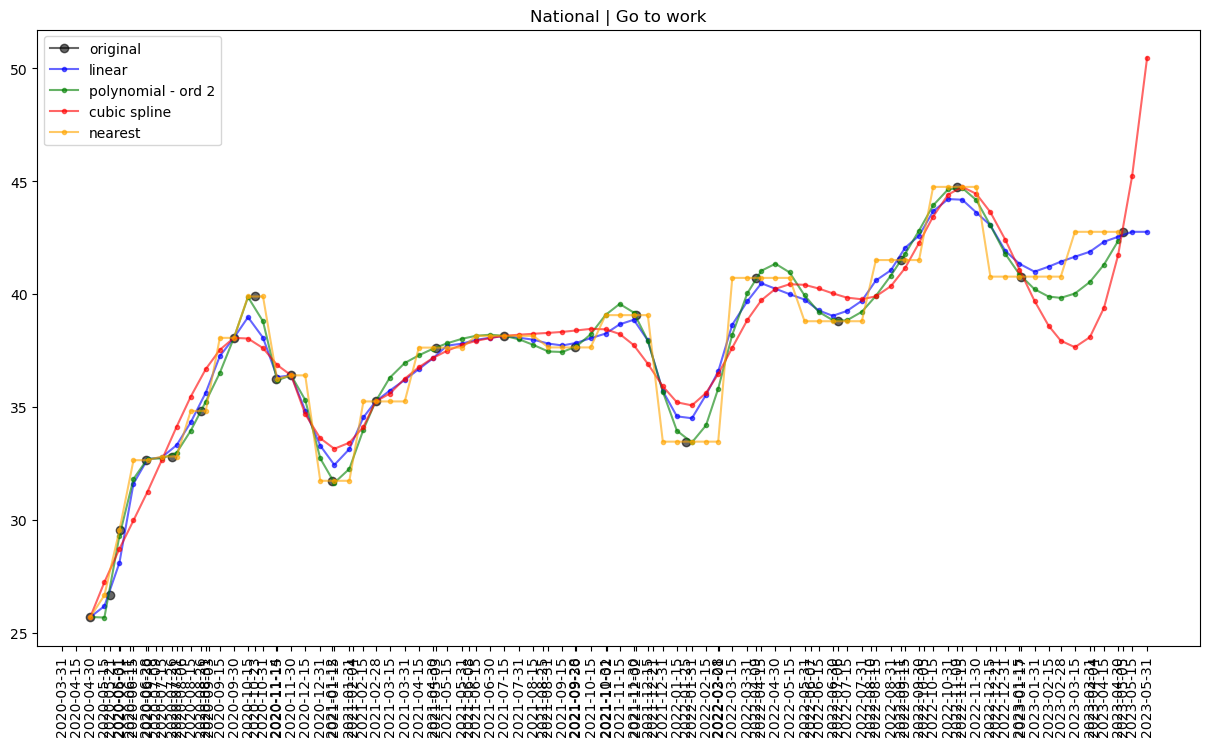

In [83]:

behaviors = ['Avoiding contact with other people',
       'Avoiding public or crowded places', 
       'Frequently washing hands',
       'Wearing a face mask when outside of your home',
       'Go to work',
       'Go to the gym', 
       'Go visit a friend',
       'Go to a cafe, bar, or restaurant', 
       'Go to a doctor or visit a hospital',
       'Go to church or another place of worship', 
       'Take mass transit (e.g. subway, bus, or train)',
       'Been in a room with someone outside of household in the past 24 hours',
       'Been in a room with 5-10 people outside of household in the past 24 hours',
       'Been in a room with 11-50 people outside of household in the past 24 hours',
       'Been in a room with over 50 people outside of household in the past 24 hours']

state_code_list = pd.read_csv(path + '/data/US_state_politic.csv')

#### Do the interpolation for one state

# for st in state_code_list.State.values:
#     for behvr in behaviors:
behvr = 'Go to work'
st = 'National'

df_bhv = raw_behave_dt27[['Wave', 'Start_Date', 'End_Date', 'state_code', behvr, 'N', 'Total_N']]
df_bhv['Start_Date'] = pd.to_datetime(df_bhv['Start_Date']).dt.strftime('%Y-%m-%d')
df_bhv['End_Date'] = pd.to_datetime(df_bhv['End_Date']).dt.strftime('%Y-%m-%d')
# display(df_bhv)
bhv = df_bhv[df_bhv['state_code'] == st][['Wave', 'Start_Date', 'End_Date', behvr]]
# display(bhv)
bhv = bhv.drop(['Start_Date', 'End_Date'], axis = 1)
# display(bhv['Wave'])
bhv['Wave'] = bhv['Wave'].apply(lambda row: str(row))
display(bhv)

bhv2 = pd.merge(bhv, processed_waves_w_bimonthly, how = 'right', on = ['Wave'])
display(bhv2)
bhv_time_srs = bhv2[['month_intervals', 'End_Date', behvr]]
display(bhv_time_srs)
# Convert date column to datetime type
bhv_time_srs['End_Date'] = pd.to_datetime(bhv_time_srs['End_Date'])

# Set date column as index
bhv_time_srs.set_index('End_Date', inplace=True)
display(bhv_time_srs)
# Linear interpolation
df_linear_interpolated = bhv_time_srs.interpolate(method='linear')

# Polynomial interpolation
df_polynomial_interpolated = bhv_time_srs.interpolate(method='polynomial', order=2)  # You can change the order as needed

# Cubic spline interpolation
df_cubic_spline_interpolated = bhv_time_srs.interpolate(method='spline', order=3)

# Nearest neighbor interpolation
df_nearest_interpolated = bhv_time_srs.interpolate(method='nearest')

bhv_time_srs_M = bhv_time_srs[(bhv_time_srs['month_intervals'] == 'month_end') | (bhv_time_srs['month_intervals'] == 'mid_month')]

plt.figure(figsize = (15, 8))
plt.plot(bhv_time_srs.index, bhv_time_srs[behvr], marker = 'o', color = 'black', label = 'original', alpha =0.6)
plt.plot(bhv_time_srs_M.index, df_linear_interpolated[(df_linear_interpolated['month_intervals'] == 'month_end') | (df_linear_interpolated['month_intervals'] == 'mid_month')][behvr], marker = '.', color = 'blue', label = 'linear', alpha = 0.6)
plt.plot(bhv_time_srs_M.index, df_polynomial_interpolated[(df_polynomial_interpolated['month_intervals'] == 'month_end') | (df_polynomial_interpolated['month_intervals'] == 'mid_month')][behvr], marker = '.', color = 'green', label = 'polynomial - ord 2', alpha = 0.6)
plt.plot(bhv_time_srs_M.index, df_cubic_spline_interpolated[(df_cubic_spline_interpolated['month_intervals'] == 'month_end') | (df_cubic_spline_interpolated['month_intervals'] == 'mid_month')][behvr], marker = '.', color = 'red', label = 'cubic spline', alpha = 0.6)
plt.plot(bhv_time_srs_M.index, df_nearest_interpolated[(df_nearest_interpolated['month_intervals'] == 'month_end') | (df_nearest_interpolated['month_intervals'] == 'mid_month')][behvr], marker = '.', color = 'orange', label = 'nearest', alpha = 0.6)
plt.title(st + ' | '+ behvr)
plt.xticks(processed_waves_w_bimonthly.End_Date, rotation = 90)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(39))  # Set maximum number of ticks
# plt.tight_layout()
plt.legend()
# print("Original Data:\n", bhv_time_srs)
# print("\nLinear Interpolated Data:\n", df_linear_interpolated)
# print("\nPolynomial Interpolated Data:\n", df_polynomial_interpolated)


### Load data

In [98]:
behave_dt.to_csv(path + '/behavior_wave_interpolated.csv', index = False)
# death_dt.to_csv(path + '/death_data_daily_with_waves.csv', index = False)

In [ ]:
behave_dt = pd.read_csv(path + '/behavior_wave_interpolated.csv')
death_dt = pd.read_csv(path + '/death_data_daily_with_waves.csv')
nst_est2021 = pd.read_csv('/Users/tamannaurmi/Documents/Research/missing_cases/' + 'NST-EST2021-alldata.csv')
state_pop = nst_est2021[5:][['NAME', 'POPESTIMATE2021']]


In [ ]:
death_dt = pd.read_csv(path + '/death_data_daily_with_waves.csv')
death_dt

In [63]:
death_dt[death_dt['state_code'] == 'AL'].

Province_State Country_Region          Last_Update      Lat    Long_  \
0          Alabama             US  2020-04-12 23:18:15  32.3182 -86.9023   
1          Alabama             US  2020-04-13 23:07:54  32.3182 -86.9023   
2          Alabama             US  2020-04-14 23:33:31  32.3182 -86.9023   
3          Alabama             US  2020-04-15 22:56:51  32.3182 -86.9023   
4          Alabama             US  2020-04-16 23:30:51  32.3182 -86.9023   
..             ...            ...                  ...      ...      ...   
811        Alabama             US  2022-07-03 04:32:09  32.3182 -86.9023   
812        Alabama             US  2022-07-04 04:31:59  32.3182 -86.9023   
813        Alabama             US  2022-07-05 04:32:23  32.3182 -86.9023   
814        Alabama             US  2022-07-06 04:32:28  32.3182 -86.9023   
815        Alabama             US  2022-07-07 04:32:14  32.3182 -86.9023   

     Confirmed  Deaths  Recovered  Active  FIPS  ...  ISO3  Testing_Rate  \
0         3667      93        NaN     NaN   1.0  ...   USA           NaN   
1         3870      99        NaN     NaN   1.0  ...   USA           NaN   
2         4041     114        NaN     NaN   1.0  ...   USA           NaN   
3         4307     118        NaN     NaN   1.0  ...   USA           NaN   
4         4465     133        NaN     NaN   1.0  ...   USA           NaN   
..         ...     ...        ...     ...   ...  ...   ...           ...   
811    1359051   19759        NaN     NaN   1.0  ...   USA           NaN   
812    1359051   19759        NaN     NaN   1.0  ...   USA           NaN   
813    1362388   19766        NaN     NaN   1.0  ...   USA           NaN   
814    1363194   19766        NaN     NaN   1.0  ...   USA           NaN   
815    1367570   19766        NaN     NaN   1.0  ...   USA           NaN   

     Hospitalization_Rate        Date  People_Tested Mortality_Rate  \
0               12.264945  2020-04-12        62029.0       2.536133   
1               12.238886  2020-04-13        64636.0       2.558140   
2               12.471541  2020-04-14        67557.0       2.821084   
3               12.883436  2020-04-15        70823.0       2.739726   
4               12.727273  2020-04-16        73878.0       2.978723   
..                    ...         ...            ...            ...   
811                   NaN  2022-07-02            NaN            NaN   
812                   NaN  2022-07-03            NaN            NaN   
813                   NaN  2022-07-04            NaN            NaN   
814                   NaN  2022-07-05            NaN            NaN   
815                   NaN  2022-07-06            NaN            NaN   

       date_url  death_daily   w  state_code  
0    2020-04-12           93   0          AL  
1    2020-04-13            6   0          AL  
2    2020-04-14           15   0          AL  
3    2020-04-15            4   0          AL  
4    2020-04-16           15   1          AL  
..          ...          ...  ..         ...  
811  2022-07-02            0  23          AL  
812  2022-07-03            0  23          AL  
813  2022-07-04            7  23          AL  
814  2022-07-05            0  23          AL  
815  2022-07-06            0  23          AL  

[816 rows x 25 columns]

In [41]:
state_code_list = pd.read_csv(path + '/US_state_politic.csv')
state_list = list(state_code_list.State.values)
state_to_code = dict(zip(state_code_list.State, state_code_list.Code))
code_to_state = dict(zip(state_code_list.Code, state_code_list.State))



In [232]:
a = behave_dt.N_state.values
for i in range(len(a)):
    if np.isnan(a[i]) == True:
        a[i] = a[i-1] + (a[i+1] - a[i-1])/2
behave_dt['N_state'] = a
behave_dt

Wave  Start_date   End_date state  Go to work  Go to the gym  \
0          1   4/16/2020  4/30/2020    AL      27.450          2.380   
1      1_gap    5/1/2020   5/1/2020    AL      26.195          1.645   
2          2    5/2/2020  5/15/2020    AL      24.940          0.910   
3          3   5/16/2020   6/1/2020    AL      34.030          1.310   
4      3_gap    6/2/2020  6/11/2020    AL      31.905          2.560   
...      ...         ...        ...   ...         ...            ...   
1627      21  12/22/2021  1/24/2022    WY      39.340          8.870   
1628  21_gap   1/25/2022   3/1/2022    WY      40.980          8.645   
1629      22    3/2/2022   4/4/2022    WY      42.620          8.420   
1630  22_gap    4/5/2022   6/7/2022    WY      40.435          8.105   
1631      23    6/8/2022   7/6/2022    WY      38.250          7.790   

      Go visit a friend  Go to a cafe, bar, or restaurant  \
0                 11.48                             7.840   
1                 13.60                             7.890   
2                 15.72                             7.940   
3                 18.32                            16.850   
4                 19.50                            16.810   
...                 ...                               ...   
1627              27.82                            20.240   
1628              28.29                            26.475   
1629              28.76                            32.710   
1630              28.00                            31.195   
1631              27.24                            29.680   

      Go to a doctor or visit a hospital  \
0                                  6.120   
1                                  6.610   
2                                  7.100   
3                                  6.310   
4                                  9.300   
...                                  ...   
1627                               7.800   
1628                              10.025   
1629                              12.250   
1630                              10.450   
1631                               8.650   

      Go to church or another place of worship  ...  \
0                                        2.480  ...   
1                                        3.215  ...   
2                                        3.950  ...   
3                                        3.990  ...   
4                                        6.635  ...   
...                                        ...  ...   
1627                                     6.540  ...   
1628                                     6.780  ...   
1629                                     7.020  ...   
1630                                     6.410  ...   
1631                                     5.800  ...   

      Wearing a face mask when outside of your home  \
0                                            50.370   
1                                            52.510   
2                                            54.650   
3                                            48.890   
4                                            53.935   
...                                             ...   
1627                                         26.230   
1628                                         18.405   
1629                                         10.580   
1630                                         11.420   
1631                                         12.260   

      Been in a room with someone outside of household in the past 24 hours  \
0                                                31.460                       
1                                                31.890                       
2                                                32.320                       
3                                                44.920                       
4                                                46.585                       
...                                                 ...                       
1627  

#### Data sanity check

Text(0.5, 1.0, 'behavior trend')

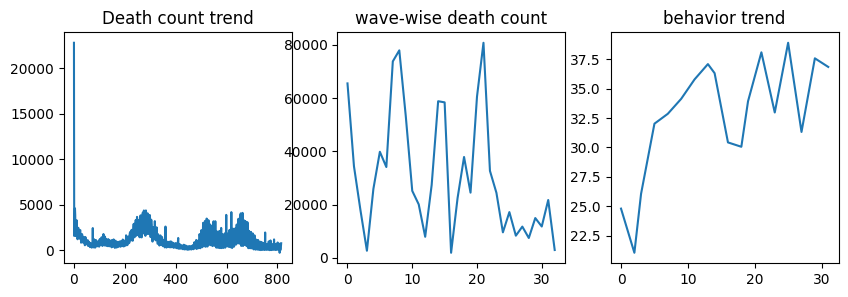

In [15]:

dt1 = death_dt[['date_url', 'death_daily']].groupby('date_url').sum().reset_index()
dt2 = death_dt[['w', 'death_daily']].groupby('w').sum().reset_index()
dt3 = behave_dt[(behave_dt.state == 'MA')]['Go to work']
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 3))
axes[0].plot(dt1.death_daily.values)
axes[0].set_title("Death count trend")

axes[1].plot(dt2.death_daily.values)
axes[1].set_title("wave-wise death count")

axes[2].plot(dt3.values)
axes[2].set_title("behavior trend")


In [ ]:
def state_death(state_name, df):
    '''
    Outputs state-wise daily deaths 
    Feed the death raw data with waves to have wave level for state-wise data
    '''
    d_state = df[df['Province_State'] == state_name]

    return d_state

def nat_death(dt):
    '''
    Input death raw data
    Outputs statewise total death count
    '''
    
    death_with_wv = death_nat_wv(death_dt)
    states_name = list(death_with_wv.state.drop_duplicates())
    df_nat = pd.DataFrame()
    for state in states_name:
        dt = state_death(state, death_with_wv)
        df_nat = pd.concat([df_nat, dt], axis = 0)
    df_nat = df_nat.groupby(['state', 'w']).sum().reset_index()
    
    return df_nat

def death_behavior_loc(location, behavior):
    cur_state_pop = state_pop[state_pop.NAME == location].POPESTIMATE2021.values[0]
    if location == 'National':
        # print('location is National')
        dt = death_dt[['w', 'death_daily']]
        dt_b = behave_dt[behave_dt['Location'] == 'National'][['Wave', behavior, 'N_state']].reset_index().drop('index', axis = 1)
    else:
        # print('location not national')
        dt = state_death(location, death_dt)[['w', 'death_daily']]
        state_code = state_to_code.get(location)
        dt_b = behave_dt[behave_dt['Location'] == state_code][['Wave', behavior, 'N_state']].reset_index().drop('index', axis = 1)
        # wsc = wave_st_cnt[wave_st_cnt['state'] == state_code]

    dt_d = dt.groupby('w').sum().reset_index()
    dt_d.columns = ['Wave', 'death_cnt']
    dt_b_d = pd.merge(dt_b, dt_d, how = 'inner', on = 'Wave')
    # dt_bd = pd.merge(dt_b_d, wave_st_cnt, how = 'left', 

    dt_b_d['death_pct'] = dt_b_d['death_cnt']*100/cur_state_pop
    dt_b_d['behavior_norm'] = dt_b_d[behavior]/sum(dt_b_d[behavior])
    dt_b_d['death_norm'] = dt_b_d['death_pct']/sum(dt_b_d['death_pct'])

    return dt_b_d
    
def lin_reg(x, y, lag):
    lr = LinearRegression()
    x = np.array(x[0:len(x)-lag]).reshape(-1, 1)
    y = y[lag:].flatten()

    model = lr.fit(x, y)
    y_pred = model.predict(x)
    anomaly = y - y_pred
    m = model.coef_
    c = model.intercept_
    x_line = np.linspace(min(x), max(x), 20)
    y_line = m*x_line + c
    
    return x, y, anomaly, x_line, y_line    



In [97]:
behave_dt = pd.concat([behave_dt, a1], axis = 0)

Text(0, 0.5, 'death count scaled 0 to 1')

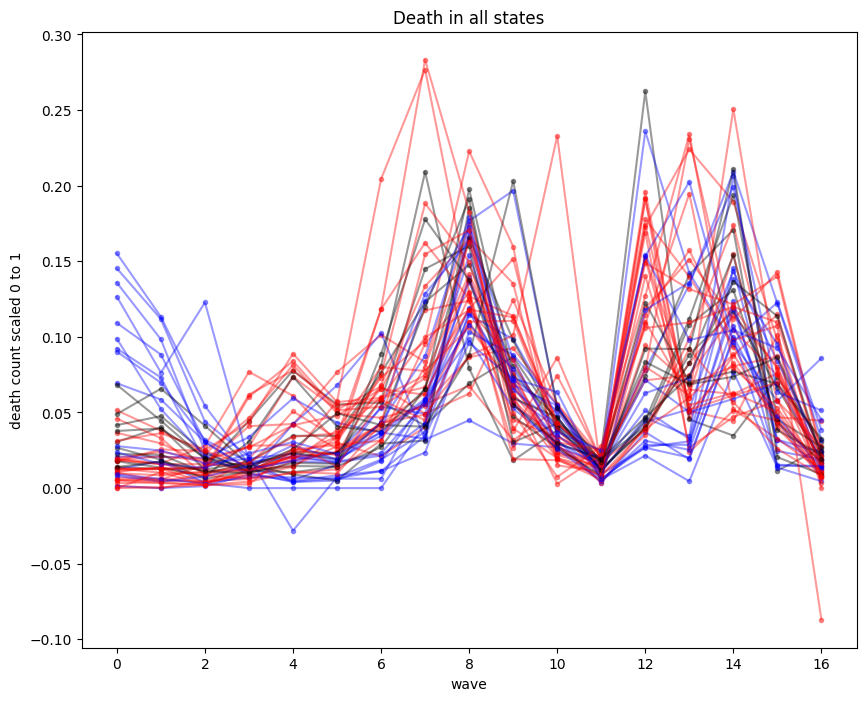

In [22]:
plt.figure(figsize= (10, 8))

behavior = 'Wearing a face mask when outside of your home'

for st in state_code_list.State.values:
    
    location = st
    dt = death_behavior_loc(location, behavior)

    if state_code_list[state_code_list.State == st].Political_aff.values[0] == 'REP':
        col = 'r'
    elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'SW':
        col = 'black'
    elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'DEM':
        col = 'b'
    
    lag = 0
    if lag == 0:
        death = dt[1:]['death_norm'].values
        behvr = dt[1:]['behavior_norm'].values
        wv = dt[1:]['Wave'].values
    else:
        death = dt['death_norm'].values
        behvr = dt['behavior_norm'].values
        wv = dt['Wave'].values

    wv_int = list(range(len(wv)))
    b_lag = behvr[0:(len(behvr)-lag)].reshape(-1, 1)
    d_lag = death[lag:].flatten()
    wv_lag = wv[lag:]


    t, d, d_anomaly, t_line, d_line = lin_reg(wv_int, death, lag) 
    t = t[0:(len(behvr)-lag)]
    plt.plot(t, d, color = col, marker = '.', alpha = 0.4, label = st)

plt.title('Death in all states')
plt.xlabel('wave')
plt.ylabel('death count scaled 0 to 1')

Text(0, 0.5, 'behavior')

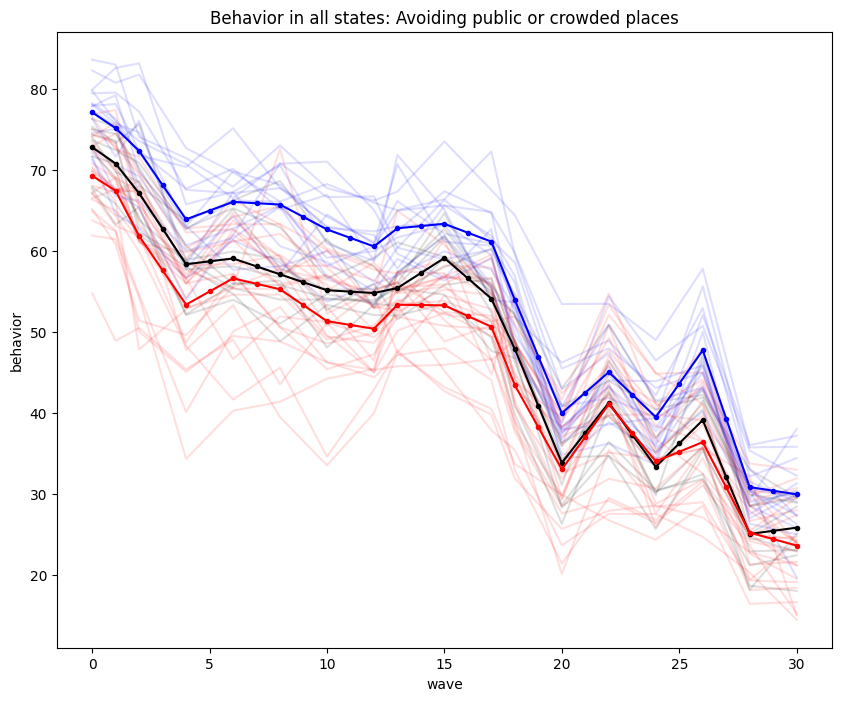

In [81]:
plt.figure(figsize= (10, 8))

behavior = 'Avoiding public or crowded places'
df_b = pd.DataFrame()
df_b_an = pd.DataFrame()
for st in state_code_list.State.values:
    
    location = st
    dt = death_behavior_loc(location, behavior)

    if state_code_list[state_code_list.State == st].Political_aff.values[0] == 'REP':
        col = 'r'
    elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'SW':
        col = 'black'
    elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'DEM':
        col = 'b'
    
    lag = 0
    if lag == 0:
        death = dt[1:]['death_norm'].values
        # behvr = dt[1:]['behavior_norm'].values
        behvr = dt[1:][behavior].values
        wv = dt[1:]['Wave'].values
    else:
        death = dt['death_norm'].values
        # behvr = dt['behavior_norm'].values
        behvr = dt[1:][behavior].values
        wv = dt['Wave'].values

    wv_int = list(range(len(wv)))

    b_lag = behvr[0:(len(behvr)-lag)].reshape(-1, 1)
    d_lag = death[lag:].flatten()
    wv_lag = wv[lag:]


    t, b, b_anomaly, t_line, b_line = lin_reg(wv_int, behvr, lag) 
    b_list = [st]
    b_list.extend(b)
    b_list.append(col)
    l = np.array(b_list)

    df_b = pd.concat([df_b, pd.DataFrame(l).T])
    
    b_an_list = [st]
    b_an_list.extend(b)
    b_an_list.append(col)
    l = np.array(b_an_list)

    df_b_an = pd.concat([df_b_an, pd.DataFrame(l).T])
    
    
    t = t[0:(len(behvr)-lag)]
    plt.plot(t, b_lag, color = col, alpha = 0.13, label = st)
    
t = t[0:(len(behvr)-lag)]
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
        
df_b_an.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']

for col in cols:
    df_b_an[col] = pd.to_numeric(df_b_an[col])

b_an_mean = df_b_an[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']].groupby('color').mean()

df_b.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']

for col in cols:
    df_b[col] = pd.to_numeric(df_b[col])

b_mean = df_b[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']].groupby('color').mean()

plt.plot(t, b_mean.loc['b'].values, color = 'b', marker = '.', label = 'democratic-leaning states')
plt.plot(t, b_mean.loc['black'].values, color = 'black', marker = '.', label = 'swing states')
plt.plot(t, b_mean.loc['r'].values, color = 'r', marker = '.', label = 'republican-leaning states')


plt.title('Behavior in all states: ' + behavior)
plt.xlabel('wave')
plt.ylabel('behavior')
# plt.legend()



In [278]:
behave_dt.columns

Index(['Wave', 'Start_date', 'End_date', 'state', 'Go to work',
       'Go to the gym', 'Go visit a friend',
       'Go to a cafe, bar, or restaurant',
       'Go to a doctor or visit a hospital',
       'Go to church or another place of worship',
       'Take mass transit (e.g. subway, bus, or train)',
       'Avoiding contact with other people',
       'Avoiding public or crowded places', 'Frequently washing hands',
       'Wearing a face mask when outside of your home',
       'Been in a room with someone outside of household in the past 24 hours',
       'Been in a room with 5-10 people outside of household in the past 24 hours',
       'Been in a room with 11-50 people outside of household in the past 24 hours',
       'Been in a room with over 50 people outside of household in the past 24 hours',
       'Start_Date', 'End_Date', 'N_national', 'N_state', 'state_name'],
      dtype='object')

Text(0, 0.5, 'behavior anomaly')

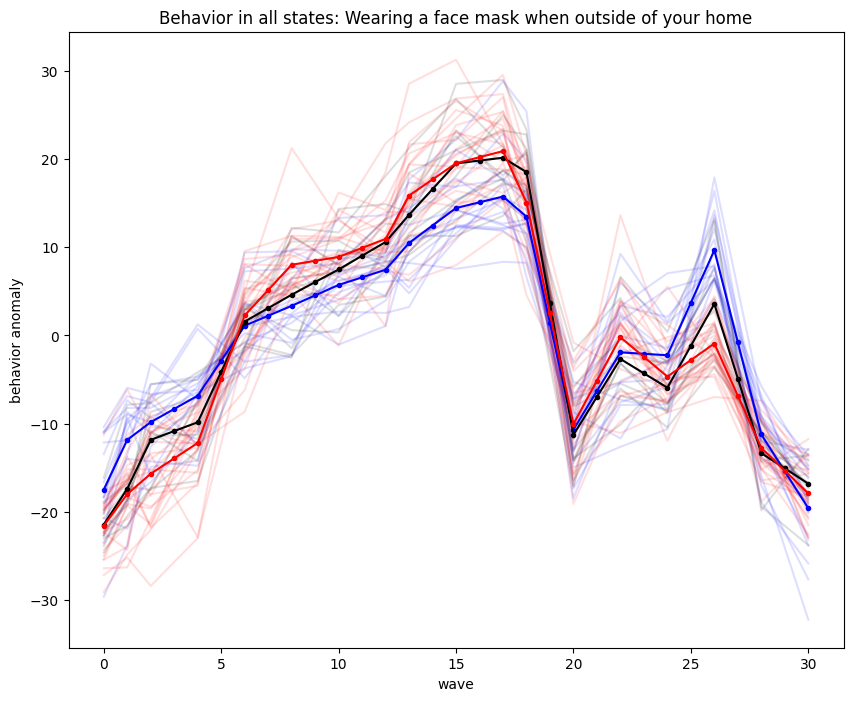

In [84]:
plt.figure(figsize= (10, 8))

behavior = 'Wearing a face mask when outside of your home'

df_b_an = pd.DataFrame()
for st in state_code_list.State.values:
    
    location = st
    dt = death_behavior_loc(location, behavior)

    if state_code_list[state_code_list.State == st].Political_aff.values[0] == 'REP':
        col = 'r'
    elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'SW':
        col = 'black'
    elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'DEM':
        col = 'b'
        

    lag = 0
    if lag == 0:
        death = dt[1:]['death_norm'].values
        # behvr = dt[1:]['behavior_norm'].values
        behvr = dt[1:][behavior].values
        wv = dt[1:]['Wave'].values
    else:
        death = dt['death_norm'].values
        # behvr = dt['behavior_norm'].values
        wv = dt['Wave'].values

    wv_int = list(range(len(wv)))

    b_lag = behvr[0:(len(behvr)-lag)].reshape(-1, 1)
    d_lag = death[lag:].flatten()
    wv_lag = wv[lag:]


    t, b, b_anomaly, t_line, b_line = lin_reg(wv_int, behvr, lag) 
    
    b_an_list = [st]
    b_an_list.extend(b_anomaly)
    b_an_list.append(col)
    l = np.array(b_an_list)

    df_b_an = pd.concat([df_b_an, pd.DataFrame(l).T])
    
    
    t = t[0:(len(behvr)-lag)]
    plt.plot(t, b_anomaly, color = col, alpha = 0.13, label = st)
    
t = t[0:(len(behvr)-lag)]
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
        
df_b_an.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']

for col in cols:
    df_b_an[col] = pd.to_numeric(df_b_an[col])

b_an_mean = df_b_an[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']].groupby('color').mean()

plt.plot(t, b_an_mean.loc['b'].values, color = 'b', marker = '.', label = 'democratic-leaning states')
plt.plot(t, b_an_mean.loc['black'].values, color = 'black', marker = '.', label = 'swing states')
plt.plot(t, b_an_mean.loc['r'].values, color = 'r', marker = '.', label = 'republican-leaning states')

plt.title('Behavior in all states: ' + behavior)
plt.xlabel('wave')
plt.ylabel('behavior anomaly')



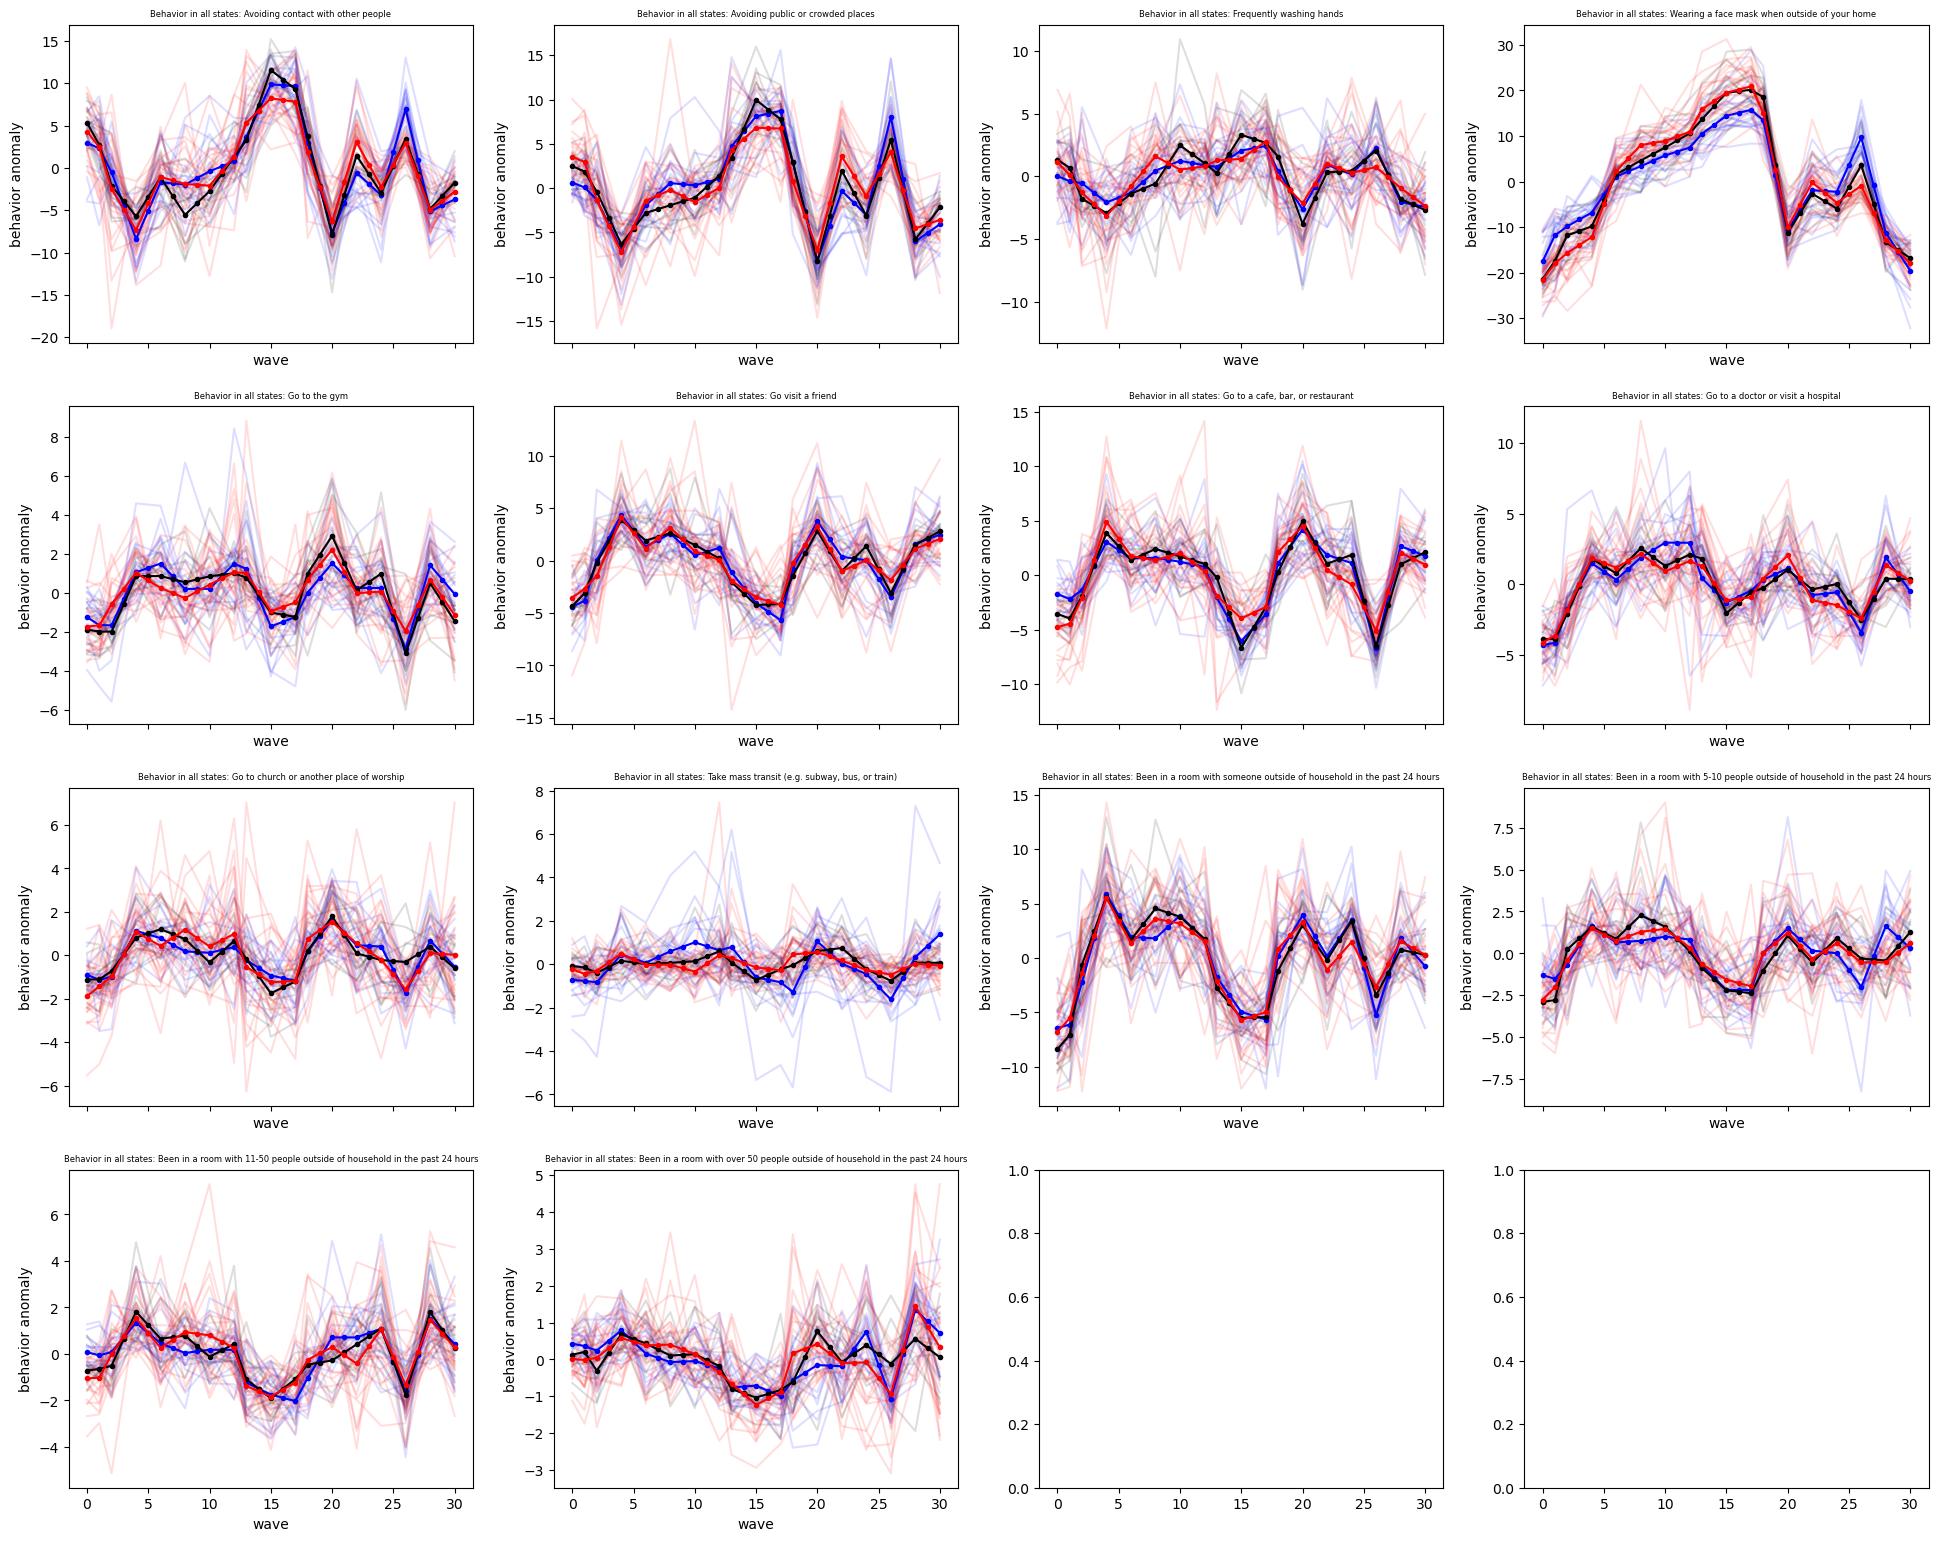

In [26]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (24, 19), sharex= True)
axes = axes.flatten()

# plt.figure(figsize= (10, 8))

behaviors = ['Avoiding contact with other people',
       'Avoiding public or crowded places', 'Frequently washing hands',
       'Wearing a face mask when outside of your home','Go to the gym', 'Go visit a friend',
       'Go to a cafe, bar, or restaurant', 'Go to a doctor or visit a hospital',
       'Go to church or another place of worship', 'Take mass transit (e.g. subway, bus, or train)',
       'Been in a room with someone outside of household in the past 24 hours',
       'Been in a room with 5-10 people outside of household in the past 24 hours',
       'Been in a room with 11-50 people outside of household in the past 24 hours',
       'Been in a room with over 50 people outside of household in the past 24 hours']

for i in range(len(behaviors)):
    behavior = behaviors[i]
    df_b = pd.DataFrame()
    df_b_an = pd.DataFrame()
    for st in state_code_list.State.values:

        location = st
        dt = death_behavior_loc(location, behavior)

        if state_code_list[state_code_list.State == st].Political_aff.values[0] == 'REP':
            col = 'r'
        elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'SW':
            col = 'black'
        elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'DEM':
            col = 'b'    

        lag = 0
        if lag == 0:
            death = dt[1:]['death_norm'].values
            # behvr = dt[1:]['behavior_norm'].values
            behvr = dt[1:][behavior].values
            wv = dt[1:]['Wave'].values
        else:
            death = dt['death_norm'].values
            # behvr = dt['behavior_norm'].values
            wv = dt['Wave'].values

        wv_int = list(range(len(wv)))

        b_lag = behvr[0:(len(behvr)-lag)].reshape(-1, 1)
        d_lag = death[lag:].flatten()
        wv_lag = wv[lag:]


        t, b, b_anomaly, t_line, b_line = lin_reg(wv_int, behvr, lag) 
        b_list = [st]
        b_list.extend(b)
        b_list.append(col)
        l = np.array(b_list)

        df_b = pd.concat([df_b, pd.DataFrame(l).T])

        b_an_list = [st]
        b_an_list.extend(b_anomaly)
        b_an_list.append(col)
        l = np.array(b_an_list)

        df_b_an = pd.concat([df_b_an, pd.DataFrame(l).T])


        t = t[0:(len(behvr)-lag)]
        axes[i].plot(t, b_anomaly, color = col, alpha = 0.13, label = st)

    t = t[0:(len(behvr)-lag)]
    cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
    df_b.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']
    df_b_an.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']

    for col in cols:
        df_b_an[col] = pd.to_numeric(df_b_an[col])

    b_an_mean = df_b_an[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']].groupby('color').mean()
    
    for col in cols:
        df_b[col] = pd.to_numeric(df_b[col])

    b_mean = df_b[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']].groupby('color').mean()

    axes[i].plot(t, b_an_mean.loc['b'].values, color = 'b', marker = '.', label = 'democratic-leaning states')
    axes[i].plot(t, b_an_mean.loc['black'].values, color = 'black', marker = '.', label = 'swing states')
    axes[i].plot(t, b_an_mean.loc['r'].values, color = 'r', marker = '.', label = 'republican-leaning states')

    axes[i].set_title('Behavior in all states: ' + behavior, fontsize = 6)
    axes[i].set_xlabel('wave')
    axes[i].set_ylabel('behavior anomaly')



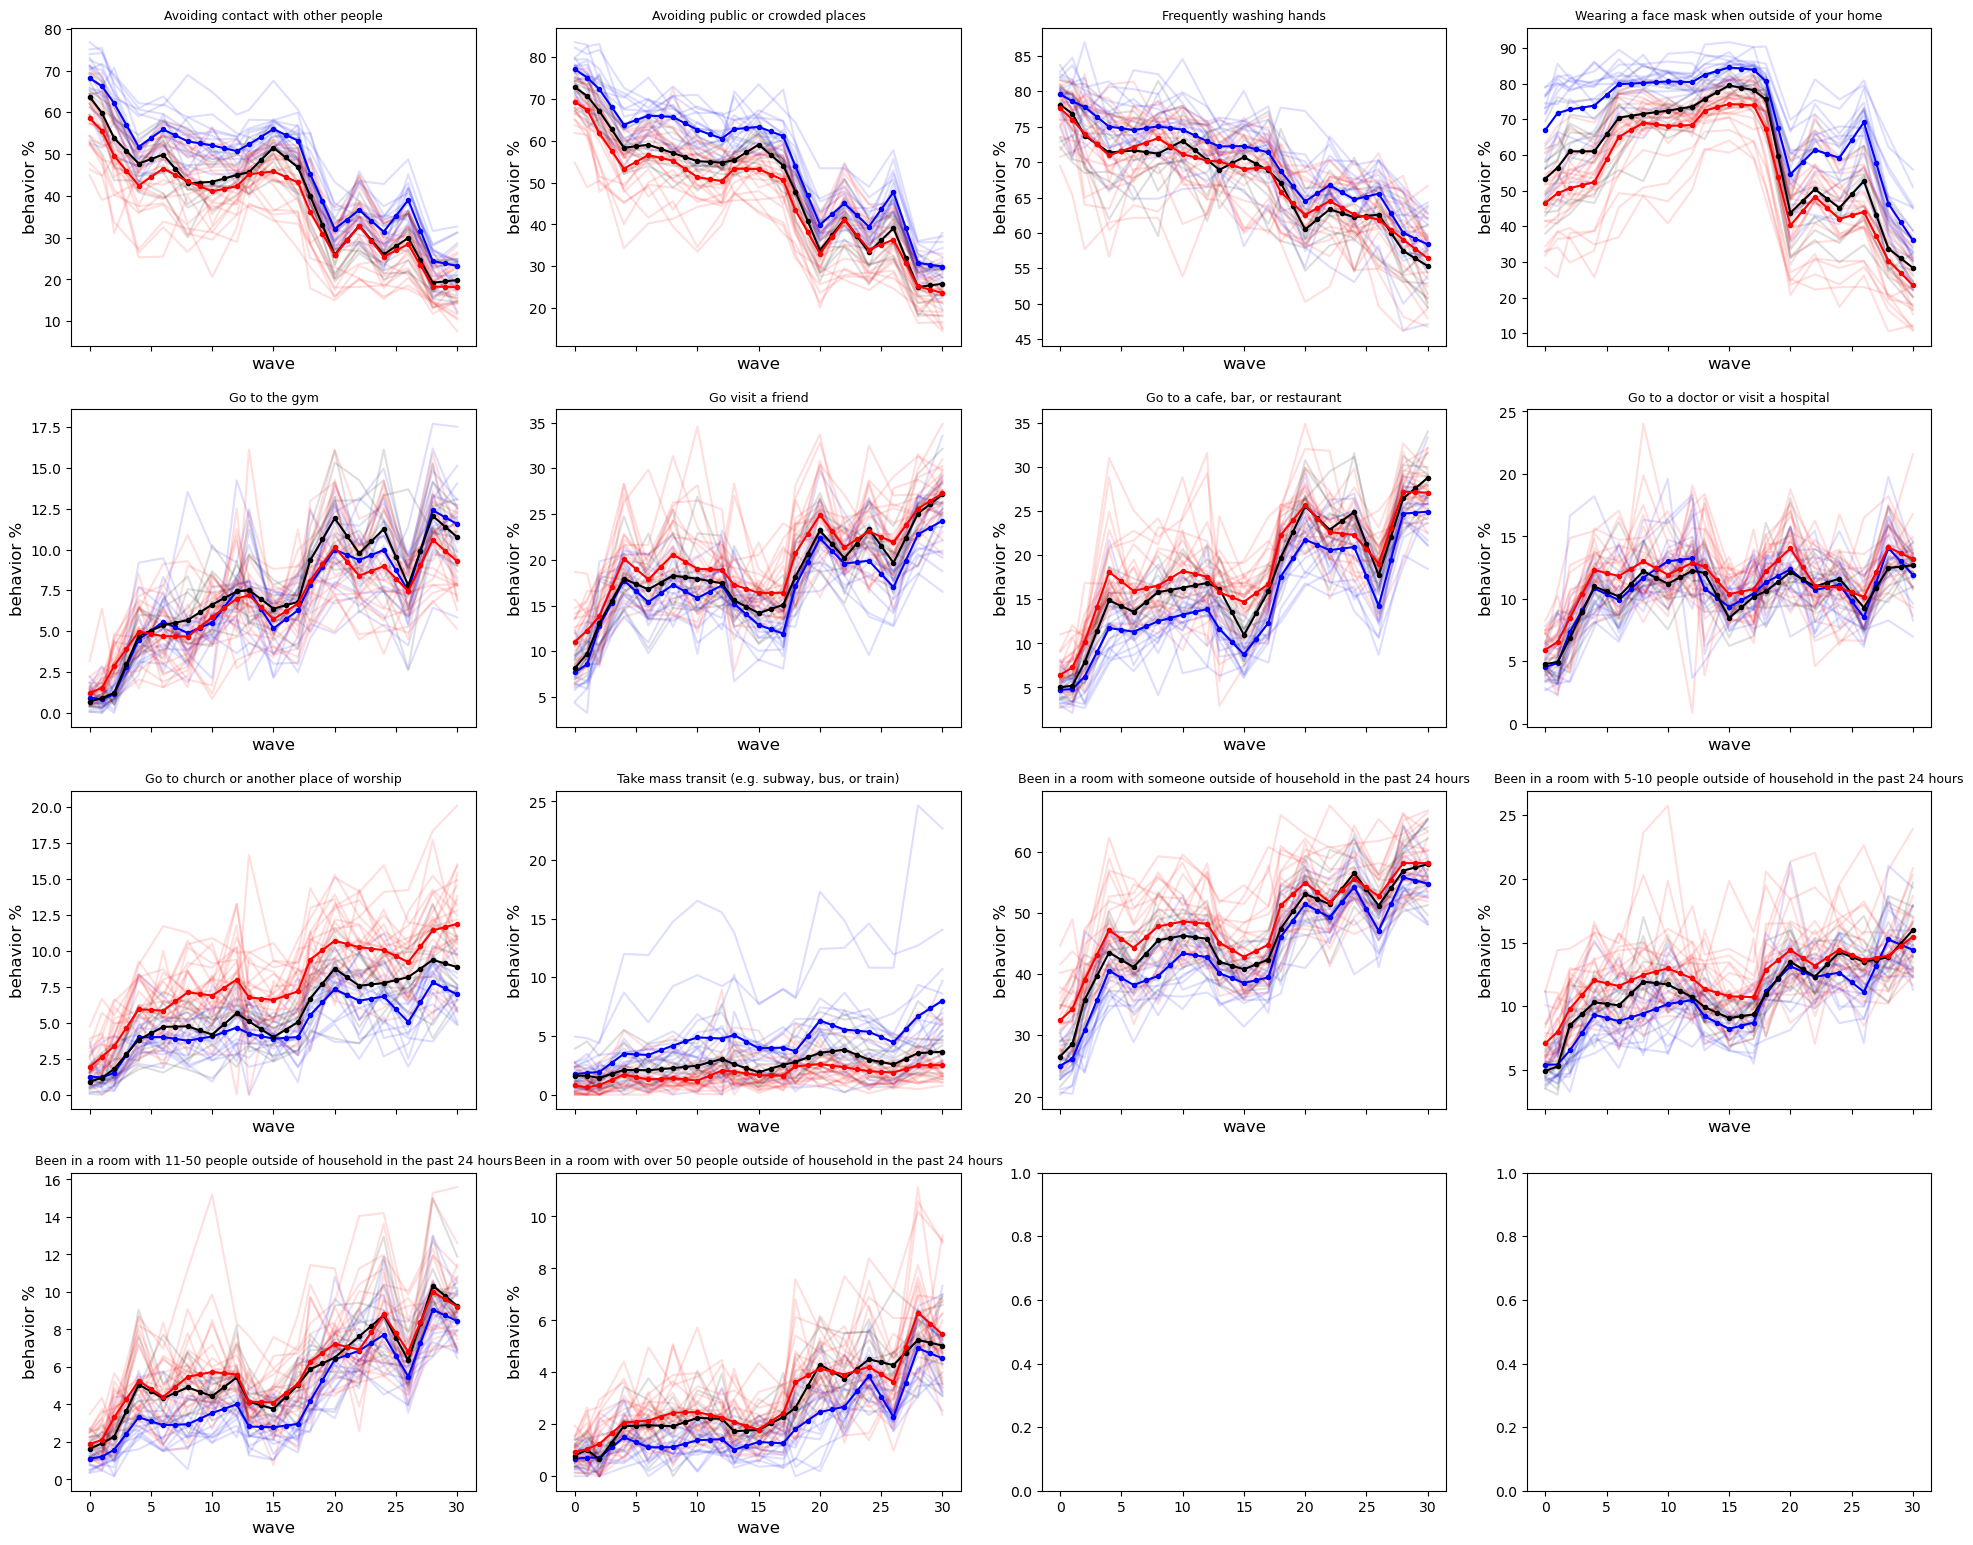

In [38]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (24, 19), sharex= True)
axes = axes.flatten()

# plt.figure(figsize= (10, 8))

behaviors = ['Avoiding contact with other people',
       'Avoiding public or crowded places', 'Frequently washing hands',
       'Wearing a face mask when outside of your home','Go to the gym', 'Go visit a friend',
       'Go to a cafe, bar, or restaurant', 'Go to a doctor or visit a hospital',
       'Go to church or another place of worship', 'Take mass transit (e.g. subway, bus, or train)',
       'Been in a room with someone outside of household in the past 24 hours',
       'Been in a room with 5-10 people outside of household in the past 24 hours',
       'Been in a room with 11-50 people outside of household in the past 24 hours',
       'Been in a room with over 50 people outside of household in the past 24 hours']


for i in range(len(behaviors)):
    behavior = behaviors[i]
    df_b = pd.DataFrame()
    df_b_an = pd.DataFrame()
    for st in state_code_list.State.values:

        location = st
        dt = death_behavior_loc(location, behavior)

        if state_code_list[state_code_list.State == st].Political_aff.values[0] == 'REP':
            col = 'r'
        elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'SW':
            col = 'black'
        elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'DEM':
            col = 'b'    

        lag = 0
        if lag == 0:
            death = dt[1:]['death_norm'].values
            # behvr = dt[1:]['behavior_norm'].values
            behvr = dt[1:][behavior].values
            wv = dt[1:]['Wave'].values
        else:
            death = dt['death_norm'].values
            # behvr = dt['behavior_norm'].values
            wv = dt['Wave'].values

        wv_int = list(range(len(wv)))

        b_lag = behvr[0:(len(behvr)-lag)].reshape(-1, 1)
        d_lag = death[lag:].flatten()
        wv_lag = wv[lag:]


        t, b, b_anomaly, t_line, b_line = lin_reg(wv_int, behvr, lag) 
        b_list = [st]
        b_list.extend(b)
        b_list.append(col)
        l = np.array(b_list)

        df_b = pd.concat([df_b, pd.DataFrame(l).T])

        b_an_list = [st]
        b_an_list.extend(b_anomaly)
        b_an_list.append(col)
        l = np.array(b_an_list)

        df_b_an = pd.concat([df_b_an, pd.DataFrame(l).T])


        t = t[0:(len(behvr)-lag)]
        axes[i].plot(t, b, color = col, alpha = 0.13, label = st)

    t = t[0:(len(behvr)-lag)]
    cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
    df_b.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']
    df_b_an.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']

    for col in cols:
        df_b_an[col] = pd.to_numeric(df_b_an[col])

    b_an_mean = df_b_an[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']].groupby('color').mean()
    
    for col in cols:
        df_b[col] = pd.to_numeric(df_b[col])

    b_mean = df_b[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                  '29', '30', '31', 'color']].groupby('color').mean()

    axes[i].plot(t, b_mean.loc['b'].values, color = 'b', marker = '.', label = 'democratic-leaning states')
    axes[i].plot(t, b_mean.loc['black'].values, color = 'black', marker = '.', label = 'swing states')
    axes[i].plot(t, b_mean.loc['r'].values, color = 'r', marker = '.', label = 'republican-leaning states')
    
    axes[i].set_title(behavior, fontsize = 9, wrap=True)
    axes[i].set_xlabel('wave', fontsize = 12)
    axes[i].set_ylabel('behavior %', fontsize = 12)
    # axes[i].set_xticks(waves_interp['End_date'], rotation = 60)


In [40]:
state_urban = pd.read_csv(path + '/state_urban.csv')
state_urban

STATEFP STATE ABBREV                             STATE NAME  \
0         1           AL                                Alabama   
1         2           AK                                 Alaska   
2         4           AZ                                Arizona   
3         5           AR                               Arkansas   
4         6           CA                             California   
5         8           CO                               Colorado   
6         9           CT                            Connecticut   
7        10           DE                               Delaware   
8        11           DC                   District of Columbia   
9        12           FL                                Florida   
10       13           GA                                Georgia   
11       15           HI                                 Hawaii   
12       16           ID                                  Idaho   
13       17           IL                               Illinois   
14       18           IN                                Indiana   
15       19           IA                                   Iowa   
16       20           KS                                 Kansas   
17       21           KY                               Kentucky   
18       22           LA                              Louisiana   
19       23           ME                                  Maine   
20       24           MD                               Maryland   
21       25           MA                          Massachusetts   
22       26           MI                               Michigan   
23       27           MN                              Minnesota   
24       28           MS                            Mississippi   
25       29           MO                               Missouri   
26       30           MT                                Montana   
27       31           NE                               Nebraska   
28       32           NV                                 Nevada   
29       33           NH                          New Hampshire   
30       34           NJ                             New Jersey   
31       35           NM                             New Mexico   
32       36           NY                               New York   
33       37           NC                         North Carolina   
34       38           ND                           North Dakota   
35       39           OH                                   Ohio   
36       40           OK                               Oklahoma   
37       41           OR                                 Oregon   
38       42           PA                           Pennsylvania   
39       44           RI                           Rhode Island   
40       45           SC                         South Carolina   
41       46           SD                           South Dakota   
42       47           TN                              Tennessee   
43       48           TX                                  Texas   
44       49           UT                                   Utah   
45       50           VT                                Vermont   
46       51           VA                               Virginia   
47       53           WA                             Washington   
48       54           WV                          West Virginia   
49       55           WI                              Wisconsin   
50       56           WY                                Wyoming   
51       60           AS                         American Samoa   
52       66           GU                                   Guam   
53       69           MP  Commonwealth of the Northern Marianas   
54       72           PR                            Puerto Rico   
55       78           VI                      US Virgin Islands   

   2020 TOTAL POP 2020 \nURBAN POP  2020 PCT URBAN POP 2020 \nRURAL POP  \
0       5,024,279        2,900,880                57.7        2,123,399   
1         733,391          475,967

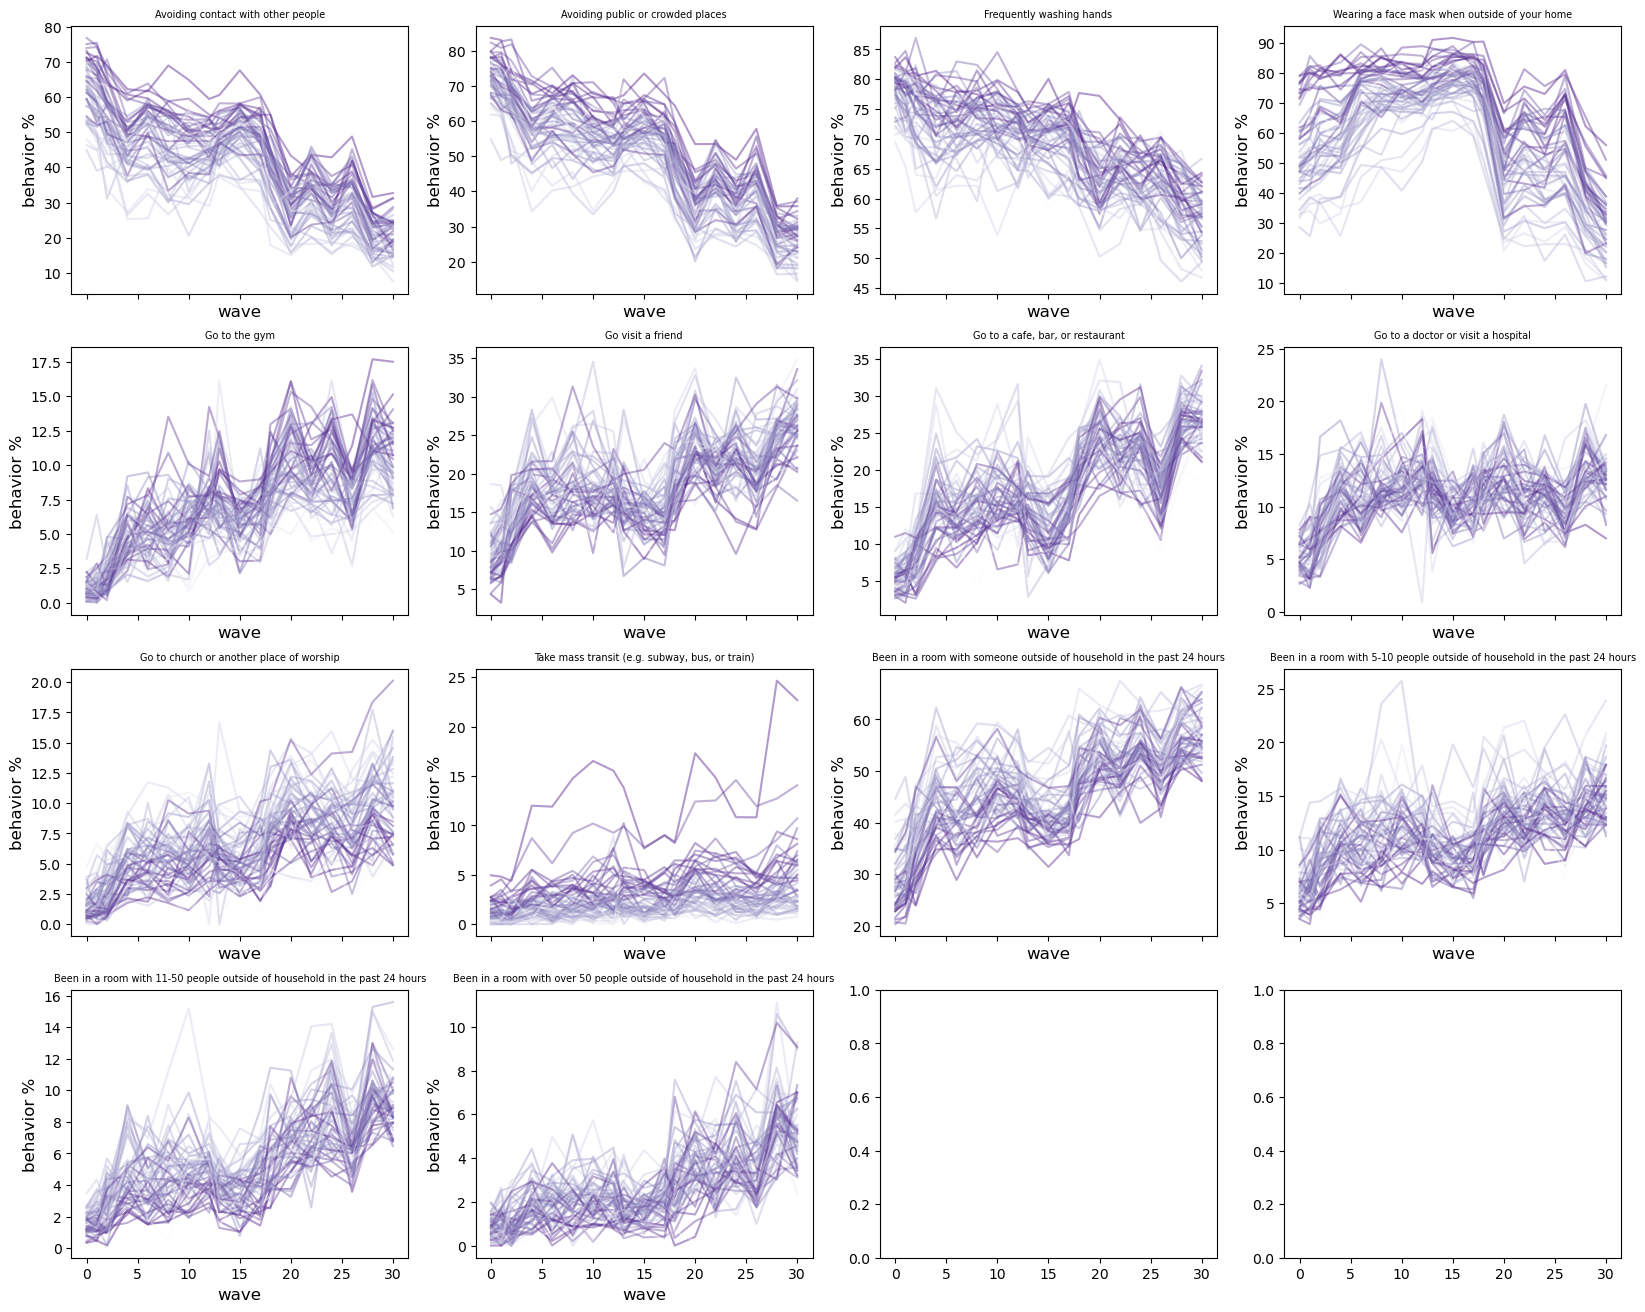

In [46]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16), sharex= True)
axes = axes.flatten()

lst = state_urban['2010 PCT URBAN POP'].values
lst = sorted(lst)

minima = min(lst)
maxima = max(lst)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Purples)

behaviors = ['Avoiding contact with other people',
       'Avoiding public or crowded places', 'Frequently washing hands',
       'Wearing a face mask when outside of your home','Go to the gym', 'Go visit a friend',
       'Go to a cafe, bar, or restaurant', 'Go to a doctor or visit a hospital',
       'Go to church or another place of worship', 'Take mass transit (e.g. subway, bus, or train)',
       'Been in a room with someone outside of household in the past 24 hours',
       'Been in a room with 5-10 people outside of household in the past 24 hours',
       'Been in a room with 11-50 people outside of household in the past 24 hours',
       'Been in a room with over 50 people outside of household in the past 24 hours']

for i in range(len(behaviors)):
    behavior = behaviors[i]
    df_b_an = pd.DataFrame()
    for st in state_code_list.State.values:

        location = st
        dt = death_behavior_loc(location, behavior)
        dt['STATE NAME'] = location
        dt = pd.merge(dt, state_urban)

        if state_code_list[state_code_list.State == st].Political_aff.values[0] == 'REP':
            col = 'r'
        elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'SW':
            col = 'black'
        elif state_code_list[state_code_list.State == st].Political_aff.values[0] == 'DEM':
            col = 'b'    

        lag = 0
        if lag == 0:
            death = dt[1:]['death_norm'].values
            # behvr = dt[1:]['behavior_norm'].values
            behvr = dt[1:][behavior].values
            wv = dt[1:]['Wave'].values
        else:
            death = dt['death_norm'].values
            # behvr = dt['behavior_norm'].values
            wv = dt['Wave'].values

        wv_int = list(range(len(wv)))

        b_lag = behvr[0:(len(behvr)-lag)].reshape(-1, 1)
        d_lag = death[lag:].flatten()
        wv_lag = wv[lag:]


        t, b, b_anomaly, t_line, b_line = lin_reg(wv_int, behvr, lag) 

        b_an_list = [st]
        b_an_list.extend(b_anomaly)
        b_an_list.append(col)
        l = np.array(b_an_list)

        df_b_an = pd.concat([df_b_an, pd.DataFrame(l).T])
        urb = dt['2020 PCT URBAN POP'][0]
        # print(mapper.to_rgba(urb))
        t = t[0:(len(behvr)-lag)]
        axes[i].plot(t, b, color = mapper.to_rgba(urb), alpha = 0.4, label = st)

    t = t[0:(len(behvr)-lag)]
    cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']

    df_b_an.columns = ['state', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']

    for col in cols:
        df_b_an[col] = pd.to_numeric(df_b_an[col])

    b_an_mean = df_b_an[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 
                      '29', '30', '31', 'color']].groupby('color').mean()


    axes[i].set_title(behavior, fontsize = 7, wrap=True)
    axes[i].set_xlabel('wave', fontsize = 12)
    axes[i].set_ylabel('behavior %', fontsize = 12)

    


In [56]:
dt['2010 PCT URBAN POP'][0]

64.8

In [22]:
lst = state_urban['2010 PCT RURAL POP'].values
lst

array([41. , 34. , 10.2, 43.8,  5.1, 13.9, 12. , 16.7,  0. ,  8.8, 24.9,
        8.1, 29.4, 11.5, 27.6, 36. , 25.8, 41.6, 26.8, 61.3, 12.8,  8. ,
       25.4, 26.7, 50.7, 29.6, 44.1, 26.9,  5.8, 39.7,  5.3, 22.6, 12.1,
       33.9, 40.1, 22.1, 33.8, 19. , 21.3,  9.3, 33.7, 43.4, 33.6, 15.3,
        9.4, 61.1, 24.6, 16. , 51.3, 29.9, 35.2, 13.6,  5.9,  9.1,  6.2,
        5.4])

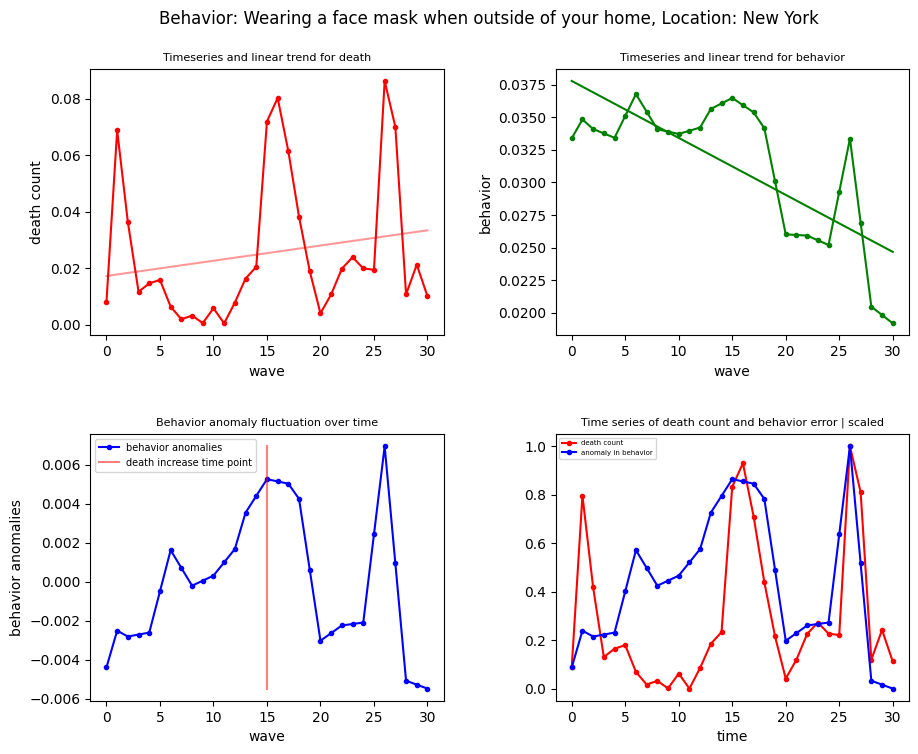

In [194]:

behavior = 'Wearing a face mask when outside of your home'
location = 'New York'
dt = death_behavior_loc(location, behavior)

lag = 0
if lag == 0:
    death = dt[1:]['death_norm'].values
    behvr = dt[1:]['behavior_norm'].values
    wv = dt[1:]['Wave'].values
else:
    death = dt['death_norm'].values
    behvr = dt['behavior_norm'].values
    wv = dt['Wave'].values

wv_int = list(range(len(wv)))


w = 5
h = 4
ncols = 2 #re. how many boxes
nrows = 2 #re. how many boxes
fs = 8

b_lag = behvr[0:(len(behvr)-lag)].reshape(-1, 1)
d_lag = death[lag:].flatten()
wv_lag = wv[lag:]


fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h))
fig.tight_layout(pad=5.0)
fig.suptitle('Behavior: ' + behavior + ', Location: ' + location)

# time vs death relationship
pos = (0, 0)
t, d, d_anomaly, t_line, d_line = lin_reg(wv_int, death, lag) 
t = t[0:(len(behvr)-lag)]
ax[pos].plot(t, d, color = 'r', marker = '.')
ax[pos].plot(t_line, d_line, color = 'r', alpha = 0.4)
title = 'Timeseries and linear trend for death'
ax[pos].set_title(title, fontsize = fs)
ax[pos].set_xlabel('wave')
ax[pos].set_ylabel('death count')

# time vs behavior relationship
pos = (0, 1)
t, b, b_anomaly, t_line, b_line = lin_reg(wv_int, behvr, lag) 
# t = t[0:(len(behvr)-lag)]
ax[pos].plot(t, b_lag, color = 'g', marker = '.')
ax[pos].plot(t_line, b_line, color = 'g')
title = 'Timeseries and linear trend for behavior'
ax[pos].set_title(title, fontsize = fs)
ax[pos].set_xlabel('wave')
ax[pos].set_ylabel('behavior')

# behavior anomalies vs behavior trend
pos = (1, 0)
min_death = [15]*20
line = np.linspace(min(b_anomaly), max(b_anomaly), 20) 
ax[pos].plot(t, b_anomaly, color = 'b', marker = '.', label = 'behavior anomalies')
ax[pos].plot(min_death, line, color = 'r', alpha = 0.5, label = 'death increase time point')
title = 'Behavior anomaly fluctuation over time'
ax[pos].set_title(title, fontsize = fs)
ax[pos].set_xlabel('wave')
ax[pos].set_ylabel('behavior anomalies')
ax[pos].legend(fontsize = 7)


# Scaled death count timeseries and scaled behavior anomaly timeseries
d_sc = (d-min(d))/(max(d)-min(d))
b_anomaly_sc = (b_anomaly-min(b_anomaly))/(max(b_anomaly)-min(b_anomaly))
pos = (1, 1)
ax[pos].plot(t, d_sc, color = 'r', marker = '.', label = 'death count')
ax[pos].plot(t, b_anomaly_sc, color = 'b', marker = '.', label = 'anomaly in behavior')
title = 'Time series of death count and behavior error | scaled'
ax[pos].set_title(title, fontsize = fs)
ax[pos].set_xlabel('time')
ax[pos].legend(fontsize = 5)


plt.show()

wave 14: death peaks
ppl responds by wearing mask AGAIN (from wv 15/16)

In [94]:
error-min(error)

array([0.02524291, 0.02433867, 0.02353891, 0.01540181, 0.01206026,
       0.01260458, 0.01279852, 0.00965476, 0.00517157, 0.        ,
       0.00753354, 0.03260024, 0.02913476, 0.02416014, 0.02332494,
       0.01831042, 0.04250039])

In [47]:
lag = 1
X0 = X[0:len(X)-lag].reshape(-1, 1)
y0 = y[lag:].flatten()
lr1 = lr.fit(X0, y0)
m1 = lr1.coef_
c1 = lr1.intercept_
x_line = np.linspace(min(X0), max(X0), 20)

y_line = m1*x_line + c1
y_pred = lr1.predict(X0)
error = y_pred - y0



In [50]:
x_ = np.linspace(min(X0), max(X0), 20)
len(x_)

20

In [ ]:
us_pop = 336997624
wv_sample_size = [22961, 22234, 24142, 26596, 21122]